# Food & Climate: Data-Driven Sustainability Project
![image.png](https://media.istockphoto.com/id/1805849861/pt/foto/harvesting-in-agriculture-crop-field.jpg?s=612x612&w=0&k=20&c=j00EhF1-GVLbuZtc7fzzWzTUSKXBhqTX_KFO3HLmZT0=) ![image.png](https://media.istockphoto.com/id/124677784/pt/foto/silhueta-de-tractor.jpg?s=612x612&w=0&k=20&c=KGG6YRaCGEOcwZRpkdAiokeOUUmz13HZ4FJcUhZ9L3g=)![image.png](https://media.istockphoto.com/id/1297005736/pt/foto/young-couple-villagers-with-milk-cans.jpg?s=612x612&w=0&k=20&c=b5s5kLwnW_QAyf5EbqdPiLR1JL99EgrLfi6sAv4S_84=) ![image.png](https://media.istockphoto.com/id/1479516556/pt/foto/grain-field-inspection.jpg?s=612x612&w=0&k=20&c=WHYjpj8KQKK7hBg64lyCPu663heNACoG9cngxgNeM-E=) 



## 1.  Project Overview: Ask questions to make data-driven decisions

1.1. Introduction and KPIs:

Over the past century, the global population has surged, with projections by the United Nations (2019) estimating it could reach 10 billion by 2050. This rapid growth has led to a corresponding increase in demand for food, energy, and water, placing immense pressure on natural resources and global food systems.

Technological advancements and economic expansion over the last 70 years have helped meet these demands, but they have also contributed to environmental challenges. One of the most pressing concerns is climate change, with consistent data indicating that Earth's annual maximum temperatures are rising at an alarming rate.

Agriculture and livestock production play a significant role in this phenomenon, accounting for 25-30% of total global CO₂ emissions. Therefore, the goal of this project is to analyze historical food production trends, quantify its environmental impact, and explore the relationship between agriculture-related emissions and climate change. Analyze global food production trends, quantify greenhouse gas emissions from food systems, and explore their relationship with climate anomalies using Python, Google Cloud Platform with BigQuery, and Tableau for Data Viz. Also hypothesis testing and statistical methods to determine their impact on climate anomalies. 

In that order, the definition of the following KPIs are in order:
* KPI: Total Global Food Production (by weight)
* KPI: GHG Emissions per Food Category/Product (Total & Per Kg)
* KPI: Country-Level GHG Emissions from Food Production
* KPI: Per Capita GHG Emissions from Food Production
* KPI: Correlation between Total Food Production/GHG Emissions and Global/Regional Temperature Anomalies.

1.2. Research Questions & Key Focus Areas:

💡 Global Food Production Trends
* How has food and feed production evolved over time?
* Which countries are the largest producers?
* Which countries are major contributors to both food production and its environmental impact?
* Which food products and feedstocks dominate global production?

💡 Environmental Impact & CO₂ Emissions
* Which foods contribute the most to greenhouse gas emissions?
* What production stages generate the highest emissions?
* How has the global temperature varied over the years?
* Which countries have experienced the most significant temperature changes?
* Is there a discernible relationship between food production, its environmental impact, and rising temperature anomalies?

2. Data Selection & Sources

For a comprehensive analysis, this project integrates three datasets, all available on Kaggle:

📌 Food Production Data (FAOSTAT - Food and Agriculture Organization)
[Kaggle: https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production]
- Covers global food and feed production from 1961 to 2013
- Includes country-level production statistics for various food items
- Source: FAOSTAT Food Production Dataset

📌 Environmental Impact of Food (Our World in Data)

food_footprints_url = (
    "https://ourworldindata.org/explorers/food-footprints?" )
- Provides data on greenhouse gas emissions from 211 major food products
- Covers various stages of the production chain (e.g., land use per kg, water withdrawals per kg, emissions per kg, etc.)
- Data source: Michael Clark et al (2022). Estimating the environmental impacts of 57,000 food products. PNAS.

📌 Climate Data - Temperature Anomalies (FAOSTAT) 
[Kaggle: https://www.kaggle.com/datasets/sevgisarac/temperature-change/data?select=Environment_Temperature_change_E_All_Data_NOFLAG.csv]
- Tracks annual surface temperature variations per country from 1961 to 2019
- Records temperature anomalies compared to the baseline period (1951-1980)
- Source: FAOSTAT Temperature Change Dataset

These datasets will be cleaned, merged, and analyzed to uncover patterns in food production, regional emissions hotspots, and climate trends linked to agriculture.

1.4. Hypothesis Testing: Structured Approach
* 📌 Null Hypothesis (H₀): There is no significant difference between the mean emissions from meat & dairy products vs. other food categories. 
* 📌 Alternative Hypothesis (H₁): Meat & dairy production generates significantly higher GHG emissions than plant-based food.
* ✅ Statistical Test: Use t-test for independent samples to compare emissions from meat/dairy vs. plant-based products.

Technologies & Tools
* Data Engineering: Python (Pandas), Kaggle Datasets
* Storage & Querying: Google BigQuery, SQL
* Statistical Analysis: SciPy, Statsmodels
* Visualization: Matplotlib, Seaborn, Tableau


# Table of contents:

1. Project Overview: Ask questions to make data-driven decisions
2. Data Preparation: Prepare the data for exportation
    * 2.1. Import the libraries
    * 2.2. Data Engineering: Python (Pandas, Numpy), Kaggle Dataset using APIs
3. Data Cleaning & Transformation: Process the data from dirty to clean
    * 3.1. Sourcing Datasets. Identifying the datasets and previewing the data
    * 3.2. Data Cleaning and Transformation
    * 3.2.1. Food and feed production worldwide dataset
        * 3.2.1.1. Standardizing column names (normalization)
        * 3.2.1.2. Missing values and quantitative variables
        * 3.2.1.3. Drop Duplicates
        * 3.2.1.4. Qualitative variables
        * 3.2.1.5. Changing dataset format

## 2. Data Preparation: Prepare the data for exportation
* 2.1. Import the libraries 
* 2.2. Data Engineering: Python (Pandas), Kaggle Datasets using APIs

### 2.1. Import the libraries

In [1]:
# Import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate # Pretty print tabular data

from IPython.display import display
%matplotlib inline
import plotly.offline as py
import statsmodels.api as sm
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from plotly.subplots import make_subplots
py.init_notebook_mode(connected=True)
import plotly.io as pio
from sklearn.ensemble import IsolationForest # Machine Learning model for anomaly detection
import squarify # for treemaps

# Set default renderer for vscode
pio.renderers.default = 'vscode'

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
# Ensure the Kaggle folder exists
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### 2.2. Data Engineering: Python (Pandas), Kaggle Datasets using APIs

#### 2.2.1. Set up the directory

In [2]:
# Import your data here
data = ".../Documents/GitHub/Food-Climate-Data-Driven-Sustainability"
os.makedirs(data, exist_ok=True)  # Create directory if it doesn't exist

#### 2.2.2. Download Datasets using APIs

* 📌 Food Production Data (FAOSTAT - Food and Agriculture Organization) is from Kaggle.

* 📌 Environmental Impact of Food (Our World in Data), I will upload locally.

* 📌 Climate Data - Temperature Anomalies (FAOSTAT) is from Kaggle

In [3]:
# Download the dataset using KaggleHub API
!kaggle datasets download -d dorbicycle/world-foodfeed-production -p {data}
!kaggle datasets download -d sevgisarac/temperature-change -p {data}

Dataset URL: https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production
License(s): CC0-1.0
  0%|                                                | 0.00/874k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 874k/874k [00:00<00:00, 984MB/s]
Dataset URL: https://www.kaggle.com/datasets/sevgisarac/temperature-change
License(s): Attribution 3.0 IGO (CC BY 3.0 IGO)
  0%|                                               | 0.00/4.07M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.07M/4.07M [00:00<00:00, 2.24GB/s]


#### 2.2.3. Extract the files

In [4]:
# Extract the files as zip files
import glob # glob is used to find all the pathnames matching a specified pattern

zip_files = glob.glob(f"{data}/*.zip")
print(zip_files)  # Lists all .zip files found

import zipfile # Extract the zip files

for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall(data)
    os.remove(zip_file)  # Cleanup after extraction

['.../Documents/GitHub/Food-Climate-Data-Driven-Sustainability/world-foodfeed-production.zip', '.../Documents/GitHub/Food-Climate-Data-Driven-Sustainability/temperature-change.zip']


In [5]:
# check the folder again
print(os.listdir(data))

['FAOSTAT_data_en_11-1-2024.csv', 'food_production_worldwide.csv', 'Food_Production.csv', 'FAOSTAT_data_11-24-2020.csv', 'FAOSTAT_dataset.csv', 'FAO.csv', 'FAOSTAT_data_1-10-2022.csv', 'Environment_Temperature_change_E_All_Data_NOFLAG.csv']


Unzip the files manually in your computer

#### 2.2.4. Load CSV files in Jupyter Notebook

In [6]:
# Define file paths

# Food production dataset from FAOSTAT
food_production_file = f"{data}/FAO.csv"  

# Temperature change dataset from Food and Agriculture Organization of the United Nations (FAOSTAT)
temperature_file_2020 = f"{data}/FAOSTAT_data_11-24-2020.csv" #country ISO3 dataset
temperature_file = f"{data}/Environment_Temperature_change_E_All_Data_NOFLAG.csv" # temperature change dataset


# Environment Impact of Food Production dataset from Our World in Data (uploaded as a CSV file)
environment_file = pd.read_csv('../Food-Climate-Data-Driven-Sustainability/Raw_Data/FAOSTAT_2022.csv')


In [7]:
# Load the 'food_production - FAO' dataset

# Install chardet if not already installed
%pip install chardet

import chardet #chardet is a character encoding detector

# Detect encoding
with open(food_production_file, 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])  # Prints the detected encoding

# Load the CSV with the detected encoding
food_production_df = pd.read_csv(food_production_file, encoding=result['encoding'])

# Create a copy of the DataFrame
food_production_df_copy = food_production_df.copy()

Note: you may need to restart the kernel to use updated packages.
ISO-8859-1


In [8]:
# Rename enviroment_file 
environment_file_df = environment_file.copy()

# Create a copy of the DataFrame
environment_file_df_copy = environment_file_df.copy()


In [9]:
# Load the 'temperature change' and 'Country ISO3' dataset

# Detect encoding for temperature datasets
with open(temperature_file, 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])  # Prints the detected encoding

# Load the CSV files with the detected encodings
temperature_df = pd.read_csv(temperature_file, encoding="latin1")  # OR
temperature_df = pd.read_csv(temperature_file, encoding="ISO-8859-1") 

# Create a copy of the DataFrame
temperature_df_copy = temperature_df.copy()

# Load the rest of dataset for 'temperature change' dataset. CSV files with the detected encodings 
country_ISO3_df = pd.read_csv(temperature_file_2020)

# Create copies of the DataFrames
country_ISO3_df_copy = country_ISO3_df.copy() #country ISO codes dataset

Johab


## 3. Data Collection & Preparation

#### 3.1. Sourcing Datasets. Identifying the datasets and previewing the data

* Food and feed production worlwide dataset (food_production_df)

In [10]:
# Preview the dataset food_production_df
food_production_df

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


1. Food and feed production worldwide dataset:

Content:
The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

* Food - refers to the total amount of the food item available as human food during the reference period.
* Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

Acknowledgements
This dataset was meticulously gathered, organized and published by the Food and Agriculture Organization of the United Nations.

The dataset has the following columns:
* Area Abbreviation: Country name abbreviation. |Object|
* Area code: Country code. |int64|
* Area: Country name |Object|
* Item code: Food item code. |int64|
* Item: Food item. |Object|
* Element code: Food or Feed code |int64|
* Element: Food or Feed |Object|
* Unit: Unit of measurement. |Object| |Unique value|
* Latitude: Latitude |float64|
* Longitude: Longitude |float64|
* Years from 1961 to 2022 |float64|
* Years 2012 to 2013 |int64|

2. Greenhouse gases emission datasatet and food and feed production dataset (enviroment_file_df) (ghg_emissions_df)

In [11]:
# Preview the dataset environment_file_df
environment_file_df

,Emissions per kilogram,Land use per kilogram,Eutrophication per kilogram,Water scarcity per kilogram,Water withdrawals per kilogram,Entity,Year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
...,...,...,...,...,...,...,...
206,5.232976,6.520732,20.053621,14237.870381,579.253113,Vegetarian pizza,2022
207,2.416308,11.875852,18.742980,160556.436125,3458.072291,Walnuts,2022
208,0.969403,1.009878,13.122616,13528.747411,743.313468,Watermelon,2022
209,1.722881,4.333116,4.642554,1925.669324,93.535379,Wine,2022


* Environment Impact of Food Production dataset

Content:
This dataset contains most 211 rows most common foods grown across the globe and 7 columns as their respective land, water usage and carbon footprints.

Columns:

    * Food product: Food product name |object|
    * Land use change - Kg CO2 - equivalents per kg product |float64|

These represent greenhouse gas emissions per kg of food product(Kg CO2 - equivalents per kg product) across different stages in the lifecycle of food production.

Eutrophication – the pollution of water bodies and ecosystems with excess nutrients – is a major environmental problem. The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor.


3. Temperature change dataset (temperature_df)

In [12]:
# Preview the dataset temperature_df
temperature_df

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297



* Temperature change dataset:

Context:

The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2023. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available. Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS).

Content:
* Statistical standards: country and regional calculations employ a definition of “Land area” consistent with SEEA Land Use definitions 

Columns:
* Area Code: The numerical code of area column, type of area code is an integer.
* Area: Countries and Territories (In 2019: 190 countries and 37 other territorial entities.), type of area is an object.
* Months code: The numerical code of months column, type of months code is an integer.
* Months: Months, Seasons, Meteorological year, type of months is an object.
* Element Code: The numerical code of element column, type of element code is an integer.
* Element: 'Temperature change', 'Standard Deviation', type of element is an object.
* Unit: Celsius degrees °C, type of unit is an object.
* Years

* Country ISO-3 dataset

In [13]:
# Preview the dataset country_ISO_df
country_ISO3_df

,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
0,2,Afghanistan,4.0,AF,AFG,NaN,NaN
1,5100,Africa,2.0,NaN,X06,NaN,NaN
2,284,Åland Islands,248.0,NaN,ALA,NaN,NaN
3,3,Albania,8.0,AL,ALB,NaN,NaN
4,4,Algeria,12.0,DZ,DZA,NaN,NaN
...,...,...,...,...,...,...,...
316,246,Yemen Ar Rp,886.0,NaN,NaN,NaN,NaN
317,247,Yemen Dem,720.0,NaN,NaN,NaN,NaN
318,248,Yugoslav SFR,890.0,NaN,NaN,NaN,1991.0
319,251,Zambia,894.0,ZM,ZMB,NaN,NaN


* FAOSTAT Country ISO3 dataset:

Columns:
* Country Code: Country numbers. |int64|
* Country: Country names |object|
* M49 Code: Country code (M49) |float64|
* ISO2 Code: 2 letters abbreviation of Country names. |object|
* ISO3 Code: 2 letters abb. of Country names. |object|
* Start Year: Start year of using |float64|
* End Year: End year of using |float64|


#### 3.2. Data Cleaning and Data Transformation

This section of the notebook clean, transforms and prepare the data contained in the datasets for data analysis using Exploratory Data Analysis (EDA) for data cleaning.

Create a function to preview the data: (preview_data)
* display(df.head) Shows a preview of the first 20 rows of the dataframe
* print(df.shape) Shows the shape of the data: rows and columns
* print(df.columns.tolist()) Gives the columns of the dataset in a list format
* print(df.types) Shows the data types of the df to later categorized them as categorical or numerical variables
* print(df.isnull(0.sum())) Shows the number of NaN values in the df

In [14]:
# Define a function to preview the data
def preview_data(df, num_rows=20):
    """Preview the first few rows of a DataFrame."""
    display(df.head(num_rows))
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Data Types:\n{df.dtypes}")
    print(f"Missing Values:\n{df.isnull().sum()}")

Importing Functions for EDA and filling the NaN values (Functions_DA_DS)

In [15]:
# Importing the Functions for EDA will help you
import sys
sys.path.append('/Users/ivanacaridad/Documents/GitHub/Funtions')

from Functions_DA_DS import * # type: ignore

##### 3.2.1. Food and feed production worlwide dataset (food_production_df)

In [16]:
# Preview food production worlwide dataset
preview_data(food_production_df)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,AFG,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,AFG,2,Afghanistan,2531,Potatoes and products,5142,Food,1000 tonnes,33.94,67.71,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
9,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81


Shape: (21477, 63)
Columns: ['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013']
Data Types:
Area Abbreviation     object
Area Code              int64
Area                  object
Item Code              int64
Item                  object
                      ...   
Y2009                float64
Y2010                float64
Y2011                float64
Y2012                  int64
Y2013                  int64
Length: 63, dtype: object
Missing Values

* We have NaN values in Years 2009, 2010, and 2011
* Data type conversion: Year columns should be standarized as INT 

In [17]:
# We have categorical and numerical columns
# Check the number of unique values in each column
food_production_df.nunique()

Area Abbreviation     169
Area Code             174
Area                  174
Item Code             117
Item                  115
                     ... 
Y2009                2029
Y2010                2046
Y2011                2081
Y2012                2084
Y2013                2107
Length: 63, dtype: int64

##### 3.2.1.1. Standardizing column names (normalization)

In [18]:
# Remove the letter 'Y' from the 'Year' column
food_production_df.rename(columns={x: x.replace('Y', '') for x in food_production_df.columns}, inplace=True)

# Delete unnecessary columns
food_production_df.drop(columns=['Area Code', 'Item Code', 'Element Code'], inplace=True)

# change the column names for simplicity
food_production_df.rename(columns={
    'Area': 'country',
    # 'area abbreviation': 'country_code',
    'Item': 'food_item',
    'Element': 'element_type',
    'Unit': 'unit_of_measurement'
}, inplace=True)

# change the column names to lowercase
food_production_df.rename(columns=lambda x: x.lower(), inplace=True) #lambda function to apply to each column name

In [19]:
# change the column names for simplicity
food_production_df.rename(columns={
    'area abbreviation': 'country_code',
}, inplace=True)

In [20]:
food_production_df


,country_code,country,food_item,element_type,unit_of_measurement,latitude,longitude,1961,1962,1963,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,Zimbabwe,Milk - Excluding Butter,Food,1000 tonnes,-19.02,29.15,230.0,232.0,234.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,Zimbabwe,"Fish, Seafood",Feed,1000 tonnes,-19.02,29.15,27.0,25.0,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,Zimbabwe,"Fish, Seafood",Food,1000 tonnes,-19.02,29.15,6.0,6.0,6.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,Zimbabwe,"Aquatic Products, Other",Food,1000 tonnes,-19.02,29.15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


##### 3.2.1.2. Missing values and quantitative variables

* Verify the percentage of null values in the df
* How many missing values are there?
* Is there a reason for this?

Step 1: Meet your data and check for null values (NaN)

In [21]:
# Check the shape of the dataset
print(f"The dataset has {food_production_df.shape[0]} rows and {food_production_df.shape[1]} columns.")

The dataset has 21477 rows and 60 columns.


* Verify the percentage of null values in the df

In [22]:
# help(percentage_nullValues) 

In [23]:
percentage_nullValues(food_production_df)

,Percentage_NaN
1984,16.5
1981,16.5
1974,16.5
1975,16.5
1976,16.5
1977,16.5
1978,16.5
1979,16.5
1982,16.5
1972,16.5


Checking for Missing Values
data.isnull().sum()

| % Missing values | Take action | Watch out!
| :- |:-| :- |< threshold|data.dropna()| Check the final number of rows that you get |> threshold|data.fillna()|

- Categorical:  data.variable.mode() [0]

- Numerical: data.variable.mean() |> 50-60%| data.drop()|Check the final number of rows that you get

In [24]:
preview_data(food_production_df)

,country_code,country,food_item,element_type,unit_of_measurement,latitude,longitude,1961,1962,1963,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
5,AFG,Afghanistan,Maize and products,Food,1000 tonnes,33.94,67.71,403.0,403.0,410.0,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AFG,Afghanistan,Millet and products,Food,1000 tonnes,33.94,67.71,17.0,18.0,19.0,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,AFG,Afghanistan,"Cereals, Other",Food,1000 tonnes,33.94,67.71,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,AFG,Afghanistan,Potatoes and products,Food,1000 tonnes,33.94,67.71,111.0,97.0,103.0,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
9,AFG,Afghanistan,Sugar cane,Feed,1000 tonnes,33.94,67.71,45.0,45.0,45.0,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81


Shape: (21477, 60)
Columns: ['country_code', 'country', 'food_item', 'element_type', 'unit_of_measurement', 'latitude', 'longitude', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
Data Types:
country_code            object
country                 object
food_item               object
element_type            object
unit_of_measurement     object
latitude               float64
longitude              float64
1961                   float64
1962                   float64
1963                   float64
1964                   float64
1965                   float64
1966                   float64
1967                   float

* The columns containing the highest percentages of missing values are the years between 1961 and 1991 (16.5 to 15.9).
In the dataset documentation we can see the following info:
    "The Food Balance sheet's data was relatively complete. A few countries that do not exist anymore, such as Czechoslovakia, were deleted from the database. Countries which were formed lately such as South Sudan were kept, even though they do not have all full data going back to 1961. In addition, data aggregation for the 7 different continents was available as well, but was not added to the dataset. Food and feed production by country and food item from 1961 to 2013, including geocoding. Y1961 - Y2011 are production years that show the amount of food item produced in 1000 tonnes."

Therefore, it makes sense that due to geopolitical evolutions in some countries we have unavailability of data.

* From 1992 to 2006 we have a range of 2.80% to 0.5% of missing values as well.

In [25]:
# Create a subset of the df containing at least one missing value
food_production_null = food_production_df[food_production_df.isnull().any(axis=1)]

# Set a ramdom seed for reproducibility
np.random.seed(0) #ramdom seed is used to ensure that the random numbers generated are the same each time the code is run

# Select a random sample of 10 rows from the DataFrame
food_production_null.sample(n=5, random_state=0)

,country_code,country,food_item,element_type,unit_of_measurement,latitude,longitude,1961,1962,1963,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
17328,SVK,Slovakia,Millet and products,Feed,1000 tonnes,48.67,19.70,NaN,NaN,NaN,...,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1
13020,MNE,Montenegro,Apples and products,Food,1000 tonnes,42.71,19.37,NaN,NaN,NaN,...,NaN,NaN,11.0,19.0,34.0,38.0,33.0,27.0,14,13
17526,SVN,Slovenia,Pigmeat,Food,1000 tonnes,46.15,15.00,NaN,NaN,NaN,...,88.0,88.0,89.0,84.0,84.0,80.0,81.0,76.0,69,58
11128,LVA,Latvia,Beer,Food,1000 tonnes,56.88,24.60,NaN,NaN,NaN,...,124.0,144.0,147.0,158.0,156.0,146.0,164.0,172.0,163,156
16103,RUS,Russian Federation,Coconuts - Incl Copra,Food,1000 tonnes,61.52,105.32,NaN,NaN,NaN,...,47.0,52.0,45.0,59.0,42.0,39.0,48.0,63.0,57,63


In these five randomly selected countries: Slovakia, Montenegro, Slovenia, Latvia, Russian Federation, production data are missing from 1961 to 1991 (Montenegro until 2005).

Source: https://www.wikipedia.org/
* Slovakia: From 1948 to 1989, Slovakia was part of communist Czechoslovakia, with strict control over its western borders and alignment with the Soviet bloc. Around 600 people died trying to flee the country, and over 8,000 were sent to forced labor camps. In 1960, it became the Czechoslovak Socialist Republic. The 1968 Prague Spring, a short-lived liberalization led by Alexander Dubček, was crushed by a Warsaw Pact invasion, killing 137 civilians. In 1969, the country became a federation of Czech and Slovak republics. Czechoslovakia supported communist allies such as North Korea, North Vietnam, and Cuba. The Velvet Revolution in 1989 ended communist rule peacefully. Slovakia declared sovereignty in 1992, and Czechoslovakia dissolved peacefully in 1993. The early years of Slovak independence were marked by political instability, crime, and economic hardship. Reformist Prime Minister Mikuláš Dzurinda took office in 1998, initiating market reforms and leading Slovakia into NATO, the EU, and the OECD.

* Montenegro: Between 1961 and 2005, Montenegro evolved from a Socialist Republic within Yugoslavia into a quasi-independent member of a new state union with Serbia. The 1963 constitution renamed it the Socialist Republic of Montenegro, and the 1974 federal constitution granted increased autonomy. With the collapse of communism in the early 1990s, Montenegro transitioned into a dominant-party parliamentary republic, joining the Federal Republic of Yugoslavia in 1992 after a referendum. That same year, its capital reverted from Titograd to Podgorica and a new tricolor flag was adopted in 1993  ￼. In 1996, under President Milo Đukanović, Montenegro began distancing its economic policy from Serbia, notably by adopting the Deutsche Mark and later the euro  ￼. In 2003, the Federal Republic of Yugoslavia restructured as the looser State Union of Serbia and Montenegro under the Belgrade Agreement and Constitutional Charter  ￼. By 2005, Montenegro was on a firm path toward full sovereignty, setting the stage for its 2006 referendum on independence.

* Slovenia: Between 1961 and 1991, Slovenia—then the Socialist Republic of Slovenia within Yugoslavia—underwent economic, political, and constitutional transformation. Economically, it was Yugoslavia’s most advanced republic, producing roughly one-fifth of its GDP and one-third of its exports  ￼. Politically, the 1974 federal constitution granted Slovenia greater autonomy, nurturing a more open socialist system. In the late 1980s, a growing civic and intellectual movement—sparked by calls for democratization—led to constitutional amendments in 1989, introducing parliamentary democracy . On 8 April 1990, Slovenia held its first multiparty elections, which ushered in the DEMOS coalition under Jože Pučnik, and on 7 March 1990 the republic dropped “Socialist” from its name  ￼. A decisive independence referendum on 23 December 1990 resulted in over 88% approval  ￼, leading to a declaration of independence on 25 June 1991 and a brief Ten‑Day War with the Yugoslav People’s Army  ￼. After the Brijuni Agreement, Slovenia achieved full sovereignty, paving the way toward its future as an independent democratic state.

* Latvia: Between 1961 and 1991, Latvia was part of the Soviet Union as the Latvian Soviet Socialist Republic, enduring Russification and industrial expansion. In 1961, traditional Latvian customs such as Midsummer celebrations were banned under Party leader Arvīds Pelše, who also purged nationalist elements and saw an influx of Russian-speaking workers to staff new factories  ￼. During the mid-1980s, reforms under Gorbachev—perestroika and glasnost—ignited national revival, leading to the foundation of the Popular Front of Latvia and other civic groups  ￼. On 4 May 1990, Latvia’s Supreme Council declared restoration of independence and dropped the “Soviet” designation  ￼. In January 1991, during “The Barricades,” civilians resisted Soviet force in Riga, suffering several casualties  ￼. A decisive referendum on 3 March 1991 saw nearly 75% in favour of independence  ￼. Following the failed August Soviet coup, Latvia formally restored its independence on 21 August 1991, with widespread international recognition shortly thereafter.

* Russian Federation: Between 1961 and 1991, the Russian Soviet Federative Socialist Republic (RSFSR) — the largest constituent of the USSR — saw dramatic political shifts. Following massive post-Stalin industrial and agricultural expansion, it functioned as a tightly controlled one-party state under the Communist Party. In June 1990, amidst growing demands for reform, the RSFSR declared state sovereignty, and on 12 June 1991, Boris Yeltsin was elected its first—and only—president, marking a pivotal break from Soviet rule  ￼. The failed August 1991 coup against Gorbachev weakened the Soviet structure, with Yeltsin emerging as the leading figure. On 8 December 1991, Russia, Ukraine, and Belarus signed the Belovezha Accords, effectively dismantling the USSR; it was formally dissolved on 26 December 1991  ￼. On 25 December, the RSFSR renamed itself the Russian Federation. As the USSR’s legal successor, Russia assumed its UN seat, nuclear arsenal, and international obligations.

The results are in line with the documentation, justifying the background regarding the presence of missing values. It is conveniente to delete the lines with missing values from the df, or fill them with the mean.

I have decided to run a test check to see if deleting the rows would cause a major lost of data.

In [26]:
# check for missing values
missing_values = food_production_null.isnull().sum()
print(missing_values[missing_values > 0])

1961    3539
1962    3539
1963    3539
1964    3539
1965    3539
1966    3539
1967    3539
1968    3539
1969    3539
1970    3539
1971    3539
1972    3539
1973    3539
1974    3539
1975    3539
1976    3539
1977    3539
1978    3539
1979    3539
1980    3539
1981    3539
1982    3539
1983    3539
1984    3539
1985    3539
1986    3539
1987    3539
1988    3539
1989    3539
1990    3415
1991    3415
1992     987
1993     612
1994     612
1995     612
1996     612
1997     612
1998     612
1999     612
2000     349
2001     349
2002     349
2003     349
2004     349
2005     349
2006     104
2007     104
2008     104
2009     104
2010     104
2011     104
dtype: int64


Step 2: Drop the columns >30% threshold

As we have less than 30% of missing values per column I have decided to not dropp those columns. Thus due that my threshold is >30% of NaN per variable. I will therefore drop the rows with NaN values.

It is conveniente to delete lines with missing values from the df, but I will create a dataframe 

In [27]:
food_production_threshold = select_threshold(food_production_df, 30)
food_production_df.columns
food_production_threshold.columns
food_production_df.head(5)

Columns to keep: 60
Those columns have a percentage of NaN less than 30 :
['1984', '1981', '1974', '1975', '1976', '1977', '1978', '1979', '1982', '1972', '1983', '1985', '1986', '1987', '1988', '1989', '1973', '1980', '1971', '1965', '1961', '1962', '1964', '1963', '1966', '1967', '1968', '1969', '1970', '1990', '1991', '1992', '1996', '1995', '1994', '1993', '1997', '1999', '1998', '2000', '2001', '2003', '2004', '2002', '2005', '2011', '2010', '2009', '2008', '2007', '2006', '2012', 'country_code', 'country', 'longitude', 'latitude', 'unit_of_measurement', 'element_type', 'food_item', '2013']


,country_code,country,food_item,element_type,unit_of_measurement,latitude,longitude,1961,1962,1963,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


So we keep all the columns

Step 3: Drop or replace rest of columns of Missing Values (run a test check first)


In [28]:
# Number of missing values in the food_production_df
food_production_df.isnull().sum()

country_code              0
country                   0
food_item                 0
element_type              0
unit_of_measurement       0
latitude                  0
longitude                 0
1961                   3539
1962                   3539
1963                   3539
1964                   3539
1965                   3539
1966                   3539
1967                   3539
1968                   3539
1969                   3539
1970                   3539
1971                   3539
1972                   3539
1973                   3539
1974                   3539
1975                   3539
1976                   3539
1977                   3539
1978                   3539
1979                   3539
1980                   3539
1981                   3539
1982                   3539
1983                   3539
1984                   3539
1985                   3539
1986                   3539
1987                   3539
1988                   3539
1989                

In [29]:
# Create a copy of the daframe to test the drop of rows with missing values
test_drop = food_production_df.dropna()

# Calculate the percentage of deleted data
percentage_deleted = round((1-test_drop.shape[0] / food_production_df.shape[0]) * 100, 2)
print(f"\nRows in the original dataframe: {food_production_df.shape[0]}.")
print(f"\nDaframe rows after removing missing values: {test_drop.shape[0]}")
print(f'\nRemoving lines that contain NaN values has eliminated {percentage_deleted}% of the data!')


Rows in the original dataframe: 21477.

Daframe rows after removing missing values: 17938

Removing lines that contain NaN values has eliminated 16.48% of the data!


In this case the data loss is tolerable, in my opininon. I could have write a function replace the NaN values with '0' via fillna(), and then delete the lines with zero. However, I noticed that the difference in the procedure is minimal using this method. 

To finish the quantitative variables I will also need to delete the rows where the production values over the entire period time are zero or negative and transfor all the numerical variables to int64.

In [30]:
# Make the test_drop the new food_production_df
food_production_df = test_drop.copy()
# Check the shape of the dataset after removing missing values
print(f"The dataset has {food_production_df.shape[0]} rows and {food_production_df.shape[1]} columns after removing missing values.")

The dataset has 17938 rows and 60 columns after removing missing values.


In [31]:
food_production_df

,country_code,country,food_item,element_type,unit_of_measurement,latitude,longitude,1961,1962,1963,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,Zimbabwe,Milk - Excluding Butter,Food,1000 tonnes,-19.02,29.15,230.0,232.0,234.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,Zimbabwe,"Fish, Seafood",Feed,1000 tonnes,-19.02,29.15,27.0,25.0,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,Zimbabwe,"Fish, Seafood",Food,1000 tonnes,-19.02,29.15,6.0,6.0,6.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,Zimbabwe,"Aquatic Products, Other",Food,1000 tonnes,-19.02,29.15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [32]:
# Create a random sample of 1 row from the food_production_df with no missing values
food_production_sample = food_production_df.sample(n=5, random_state=0)
# Display the random sample
display(food_production_sample)

,country_code,country,food_item,element_type,unit_of_measurement,latitude,longitude,1961,1962,1963,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
8720,HND,Honduras,"Fish, Body Oil",Food,1000 tonnes,15.20,-86.24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
19165,TGO,Togo,Rice (Milled Equivalent),Food,1000 tonnes,8.62,0.82,12.0,9.0,12.0,...,134.0,119.0,121.0,135.0,138.0,135.0,142.0,151.0,156,177
7620,DEU,Germany,"Meat, Other",Food,1000 tonnes,51.17,10.45,68.0,74.0,78.0,...,112.0,111.0,167.0,225.0,220.0,207.0,182.0,184.0,189,205
14922,PAN,Panama,Pineapples and products,Food,1000 tonnes,8.54,-80.78,3.0,3.0,4.0,...,31.0,14.0,25.0,29.0,20.0,36.0,39.0,17.0,16,17
21444,ZWE,Zimbabwe,Pelagic Fish,Feed,1000 tonnes,-19.02,29.15,27.0,25.0,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15


In [33]:
# Select a dataframe subset containing all the columns of production years
prod_values = test_drop.loc[:, '1961':]

# Get the indexes of rows containing at least one negative value and all 0 values from 1961 to 2013
neg_values = prod_values.loc[((prod_values < 0).any(axis=1)) | ((prod_values == 0).all(axis=1))].index

# Delete all the rows with negative values or all 0 values
food_production_df.drop(index=neg_values, inplace=True)

# Transform number values to int64
food_production_df.loc[:, '1961':] = food_production_df.loc[:, '1961':].astype('int64')
# Check the shape of the dataset after removing negative values
print(f"The dataset has {food_production_df.shape[0]} rows and {food_production_df.shape[1]} columns after removing negative and 0 values.")

The dataset has 14970 rows and 60 columns after removing negative and 0 values.


##### 3.2.1.3. Drop Duplicates

Drop Duplicates

data.drop_duplicates()

| Method | Information | What you should check
| :- |:-| :- |data.drop_duplicates()| Drop duplicates in order to not having duplicated info (not relevant!) |The final size of your dataset, do you have enough rows?

We already have a backup or our dataset (food_production_df_copy)

The first step is create always a backup of our dataset (food_production_df_copy)

In [34]:
# Look for any duplicate rows in the DataFrame
food_production_df.loc[food_production_df.duplicated()].sample(5, random_state=0)

,country_code,country,food_item,element_type,unit_of_measurement,latitude,longitude,1961,1962,1963,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
6130,ECU,Ecuador,Eggs,Food,1000 tonnes,-1.83,-78.18,7.0,8.0,8.0,...,65.0,66.0,73.0,75.0,78.0,82.0,97.0,116.0,127,126
14856,PAK,Pakistan,Milk - Excluding Butter,Feed,1000 tonnes,30.38,69.35,295.0,303.0,310.0,...,1402.0,1450.0,1532.0,1581.0,1636.0,1686.0,1744.0,1797.0,1868,1912
2664,BRA,Brazil,Milk - Excluding Butter,Feed,1000 tonnes,-14.24,-51.93,450.0,512.0,389.0,...,1571.0,1607.0,1671.0,1701.0,1739.0,1739.0,1841.0,1842.0,1868,1898
1435,BGD,Bangladesh,Eggs,Food,1000 tonnes,23.68,90.36,16.0,21.0,24.0,...,183.0,217.0,208.0,205.0,217.0,176.0,218.0,232.0,281,326
4261,CHN,"China, mainland",Milk - Excluding Butter,Food,1000 tonnes,35.86,104.20,1555.0,1582.0,1608.0,...,26257.0,29969.0,34319.0,36890.0,37730.0,39443.0,41583.0,42523.0,44706,45252


In [35]:
# Create a copy of the df after filling the missing values
food_production_cleaned_copy = food_production_df.copy()

# Delete the duplicates in the food_production_df
food_prod = food_production_df.drop_duplicates()

# Reset the index of the DataFrame
food_production_df.reset_index(drop=True, inplace=True)

# Now let's check both datasets
print('Shape of the original dataset:', food_production_cleaned_copy.shape)
print('Shape of the cleaned dataset:', food_prod.shape)
print('Number of duplicates in the original dataset:', food_production_cleaned_copy.duplicated().sum())
print('Number of duplicates in the cleaned dataset:', food_prod.duplicated().sum())

Shape of the original dataset: (14970, 60)
Shape of the cleaned dataset: (14602, 60)
Number of duplicates in the original dataset: 368
Number of duplicates in the cleaned dataset: 0


In [36]:
# Check the info of the cleaned dataset (food_prod)
food_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14602 entries, 0 to 21474
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         14602 non-null  object 
 1   country              14602 non-null  object 
 2   food_item            14602 non-null  object 
 3   element_type         14602 non-null  object 
 4   unit_of_measurement  14602 non-null  object 
 5   latitude             14602 non-null  float64
 6   longitude            14602 non-null  float64
 7   1961                 14602 non-null  float64
 8   1962                 14602 non-null  float64
 9   1963                 14602 non-null  float64
 10  1964                 14602 non-null  float64
 11  1965                 14602 non-null  float64
 12  1966                 14602 non-null  float64
 13  1967                 14602 non-null  float64
 14  1968                 14602 non-null  float64
 15  1969                 14602 non-null  floa

##### 3.2.1.4. Qualitative variables

3.2.1.4.1. Qualitative variables - Country names

Create a function fuzzywuzzy> to control qualitative variables

* Purpose: Finds the closest match for a given list of country names (test) within a target list (target).
* Returns: A dictionary where each country name in test maps to its closest matches and similarity scores.

Parameter Breakdown
* dictionary: A dictionary to store the matched results.
* test: The list of country names you want to match.
* target: The reference list of country names.
* treshold (should be threshold): The similarity score minimum required to consider a match.
* first, last: Control the range of matches stored.
* show: If True, returns a DataFrame with the results.

In [37]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [38]:
# Create a function to check for duplicate variables
def fuzz_finder(dictionary, test, target, treshold, first, last, show):

    """This function inserts in a dictionary at will the best matches between the names 
    of the elements of two lists, 'test' and 'target'. 
    Note: The dictionary must be already initialized before running the function.  

    The dictionary keys correspond to the names of the items to be tested, 
    while the values correspond to the list of items obtained for best match. 
    To test the elements of a list with itself it is sufficient to indicate it both as 'test' and as 'target'.
     
    You must specify a 'treshold', a number between 0 and 100, as the threshold score to be reached 
    between the first and second items in comparison. To perform a finer search, assign the value 'treshold'
    a number close to 100. By default the score refers to the comparison of the test element with the second target element.
    
    With 'first' and 'last' you decide the first and last item to be inserted in the list of values in the dictionary.  
    
    The resulting dictionary is transformed into a dataframe to improve the output. Setting 'show' = True 
    you can decide whether or not to display the output of the function.""" 

    for item in test:

        # Returns a list of tuples containing element's name and its score
        matches = process.extract(item, target, limit=None, scorer=fuzz.token_sort_ratio)
        
        if matches[1][1] >= treshold and first != last:        

            key = item 
            
            values = [(matches[n][0], matches[n][1]) for n in range(first,last+1)]
            
            dictionary[key] = values
        
        elif matches[1][1] >= treshold and first == last:

            key = item

            value = (matches[first][0], matches[first][1])

            dictionary[key] = value

    if show:

        df_result = pd.DataFrame.from_dict(dictionary)
        return df_result

In [39]:
# Initialize a dictionary where to insert the correspondences
country_dict = {}

# List of items to test
test_target_list = food_prod.country.unique()

# Best matches with the first 10 items in order of score
fuzz_finder(dictionary=country_dict, test=test_target_list, target=test_target_list, treshold=85, first=1, last=50, show=True)

,Australia,Austria,Democratic People's Republic of Korea,Iceland,Ireland,Lao People's Democratic Republic
0,"(Austria, 88)","(Australia, 88)","(Lao People's Democratic Republic, 90)","(Ireland, 86)","(Iceland, 86)","(Democratic People's Republic of Korea, 90)"
1,"(Mauritania, 63)","(Costa Rica, 59)","(Republic of Korea, 63)","(Finland, 71)","(Finland, 71)","(Central African Republic, 57)"
2,"(Guatemala, 56)","(Mauritania, 59)","(Central African Republic, 52)","(Switzerland, 67)","(Switzerland, 67)","(Iran (Islamic Republic of), 57)"
3,"(Costa Rica, 53)","(Algeria, 57)","(Iran (Islamic Republic of), 52)","(Thailand, 67)","(Thailand, 67)","(Republic of Korea, 57)"
4,"(Israel, 53)","(Tunisia, 57)","(Dominican Republic, 51)","(Canada, 62)","(Israel, 62)","(Dominican Republic, 56)"
5,"(Albania, 50)","(Bulgaria, 53)","(Venezuela (Bolivarian Republic of), 49)","(Poland, 62)","(Poland, 62)","(Venezuela (Bolivarian Republic of), 50)"
6,"(Algeria, 50)","(Malaysia, 53)","(United States of America, 43)","(Swaziland, 62)","(Rwanda, 62)","(United States of America, 39)"
7,"(Jamaica, 50)","(Pakistan, 53)","(Bolivia (Plurinational State of), 39)","(Netherlands, 56)","(Swaziland, 62)","(Sao Tome and Principe, 38)"
8,"(Romania, 50)","(Suriname, 53)","(China, Taiwan Province of, 39)","(New Zealand, 56)","(Grenada, 57)","(United Republic of Tanzania, 37)"
9,"(Switzerland, 50)","(Argentina, 50)","(United Republic of Tanzania, 38)","(Chad, 55)","(Netherlands, 56)","(China, Taiwan Province of, 36)"


There are no duplicates values. There is only one incougruity in the description name of Cote d'Ivoire

In [40]:
# Replace the country name "Côte d'Ivoire" with "Cote d'Ivoire" in the 'country' column
food_prod.country.replace({"Côte d'Ivoire":"Cote d'Ivoire"}, inplace=True)

# Change the 'country' Viet Nam to Vietnam
food_prod.country.replace({'Viet Nam': 'Vietnam'}, inplace=True)

# Check the unique values in the 'country' column
food_prod.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Cyprus',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
  

3.2.1.4.2. Qualitative variables - Food list

Use the function fuzz_finder to also check for duplicates and bad formatted values in the dataset

In [41]:
# Initialize a dictionary where to insert the correspondences
item_dict = {}

# List of items to test
test_target_list = food_prod.food_item.unique()

# Best matches with the first 10 items in order of score.
fuzz_finder(dictionary=item_dict, test=test_target_list, target=test_target_list, treshold=85, first=1, last=10, show=True)

,Maize and products,Millet and products,"Oilcrops Oil, Other",Apples and products,Pineapples and products,"Beverages, Alcoholic",Alcoholic Beverages,"Oilcrops, Other"
0,"(Millet and products, 86)","(Maize and products, 86)","(Oilcrops, Other, 88)","(Pineapples and products, 90)","(Apples and products, 90)","(Alcoholic Beverages, 100)","(Alcoholic Beverages, 100)","(Oilcrops Oil, Other, 88)"
1,"(Barley and products, 81)","(Barley and products, 79)","(Molluscs, Other, 69)","(Barley and products, 84)","(Potatoes and products, 77)","(Beverages, Fermented, 47)","(Beverages, Fermented, 47)","(Oilcrops, 73)"
2,"(Apples and products, 81)","(Apples and products, 79)","(Oilcrops, 62)","(Maize and products, 81)","(Barley and products, 76)","(Vegetables, Other, 46)","(Vegetables, Other, 46)","(Molluscs, Other, 71)"
3,"(Potatoes and products, 77)","(Nuts and products, 78)","(Citrus, Other, 60)","(Potatoes and products, 80)","(Millet and products, 76)","(Ricebran Oil, 45)","(Ricebran Oil, 45)","(Citrus, Other, 69)"
4,"(Coffee and products, 76)","(Pineapples and products, 76)","(Cereals, Other, 58)","(Millet and products, 79)","(Nuts and products, 75)","(Olive Oil, 43)","(Olive Oil, 43)","(Cereals, Other, 67)"
5,"(Nuts and products, 74)","(Coffee and products, 74)","(Aquatic Animals, Others, 55)","(Nuts and products, 78)","(Maize and products, 73)","(Oranges, Mandarines, 43)","(Oranges, Mandarines, 43)","(Fruits, Other, 62)"
6,"(Lemons, Limes and products, 74)","(Lemons, Limes and products, 73)","(Fruits, Other, 53)","(Cassava and products, 77)","(Coffee and products, 71)","(Sesameseed Oil, 42)","(Sesameseed Oil, 42)","(Sugar Crops, 56)"
7,"(Cassava and products, 74)","(Grapefruit and products, 71)","(Ricebran Oil, 53)","(Grapefruit and products, 76)","(Lemons, Limes and products, 71)","(Vegetable Oils, 42)","(Vegetable Oils, 42)","(Olive Oil, 52)"
8,"(Pineapples and products, 73)","(Potatoes and products, 70)","(Olive Oil, 52)","(Coffee and products, 74)","(Grapefruit and products, 70)","(Sweeteners, Other, 40)","(Sweeteners, Other, 40)","(Marine Fish, Other, 52)"
9,"(Grapefruit and products, 73)","(Rye and products, 69)","(Marine Fish, Other, 51)","(Lemons, Limes and products, 73)","(Cassava and products, 70)","(Olives (including preserved), 40)","(Olives (including preserved), 40)","(Meat, Other, 50)"


It looks like we have only one duplicate value ('Beverages, Alcoholic' with 'Alcoholic Beverages').

In [42]:
# Resolve the incosistence using df.replace()
food_prod.food_item.replace({'Beverages, Alcoholic':'Alcoholic Beverages',}, inplace=True)

In [43]:
food_prod

,country_code,country,food_item,element_type,unit_of_measurement,latitude,longitude,1961,1962,1963,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21467,ZWE,Zimbabwe,Meat,Food,1000 tonnes,-19.02,29.15,63.0,62.0,64.0,...,222.0,228.0,233.0,238.0,242.0,265.0,262.0,277.0,280,258
21468,ZWE,Zimbabwe,Offals,Food,1000 tonnes,-19.02,29.15,8.0,8.0,9.0,...,20.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0,22,22
21469,ZWE,Zimbabwe,Animal fats,Food,1000 tonnes,-19.02,29.15,3.0,3.0,3.0,...,26.0,26.0,29.0,29.0,27.0,31.0,30.0,25.0,26,20
21473,ZWE,Zimbabwe,"Fish, Seafood",Feed,1000 tonnes,-19.02,29.15,27.0,25.0,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15


##### 3.2.1.5. Quantitative variables - Changing dataset format

In order to read the df more easily is precise to change the wide format to long format Year.

In [44]:
food_prod

,country_code,country,food_item,element_type,unit_of_measurement,latitude,longitude,1961,1962,1963,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21467,ZWE,Zimbabwe,Meat,Food,1000 tonnes,-19.02,29.15,63.0,62.0,64.0,...,222.0,228.0,233.0,238.0,242.0,265.0,262.0,277.0,280,258
21468,ZWE,Zimbabwe,Offals,Food,1000 tonnes,-19.02,29.15,8.0,8.0,9.0,...,20.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0,22,22
21469,ZWE,Zimbabwe,Animal fats,Food,1000 tonnes,-19.02,29.15,3.0,3.0,3.0,...,26.0,26.0,29.0,29.0,27.0,31.0,30.0,25.0,26,20
21473,ZWE,Zimbabwe,"Fish, Seafood",Feed,1000 tonnes,-19.02,29.15,27.0,25.0,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15


In [45]:
# melting the DataFrame to have a long format
food_prod = food_prod.melt(id_vars=['country', 'country_code', 'food_item', 'element_type', 'unit_of_measurement', 'latitude', 'longitude'],
                           value_vars=[str(n) for n in range(1961, 2013+1)],
                           var_name='year',
                           value_name='production')

In [46]:
# Convert the 'Year' column to int and reset the index
food_prod['year'] = food_prod['year'].astype(int)
food_prod.reset_index(drop=True, inplace=True)

# Final dataset:
food_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773906 entries, 0 to 773905
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              773906 non-null  object 
 1   country_code         773906 non-null  object 
 2   food_item            773906 non-null  object 
 3   element_type         773906 non-null  object 
 4   unit_of_measurement  773906 non-null  object 
 5   latitude             773906 non-null  float64
 6   longitude            773906 non-null  float64
 7   year                 773906 non-null  int64  
 8   production           773906 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 53.1+ MB


* Final dataset:

In [47]:
# Rename food_prod to FAOSTAT_df
FAOSTAT_df = food_prod.copy()

##### 3.2.2. Environmental Impact Factors dataset (enviroment_file_pd)

##### 3.2.2.1. Standardizing column names (normalization)

In [48]:
environment_file_df

,Emissions per kilogram,Land use per kilogram,Eutrophication per kilogram,Water scarcity per kilogram,Water withdrawals per kilogram,Entity,Year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
...,...,...,...,...,...,...,...
206,5.232976,6.520732,20.053621,14237.870381,579.253113,Vegetarian pizza,2022
207,2.416308,11.875852,18.742980,160556.436125,3458.072291,Walnuts,2022
208,0.969403,1.009878,13.122616,13528.747411,743.313468,Watermelon,2022
209,1.722881,4.333116,4.642554,1925.669324,93.535379,Wine,2022


In [49]:
preview_data(environment_file_df)

,Emissions per kilogram,Land use per kilogram,Eutrophication per kilogram,Water scarcity per kilogram,Water withdrawals per kilogram,Entity,Year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
5,1.244974,1.765165,6.619580,8193.821802,396.387449,Apple pie,2022
6,0.507354,0.668999,1.205580,2469.089299,90.334227,Apples,2022
7,1.382105,1.368510,11.446767,24526.647687,851.048765,Apricot jam,2022
8,0.925692,1.401769,4.001620,25692.928600,310.514263,Asparagus,2022
9,0.921227,1.248931,2.671238,32696.893523,367.414299,Avocados,2022


Shape: (211, 7)
Columns: ['Emissions per kilogram', 'Land use per kilogram', 'Eutrophication per kilogram', 'Water scarcity per kilogram', 'Water withdrawals per kilogram', 'Entity', 'Year']
Data Types:
Emissions per kilogram            float64
Land use per kilogram             float64
Eutrophication per kilogram       float64
Water scarcity per kilogram       float64
Water withdrawals per kilogram    float64
Entity                             object
Year                                int64
dtype: object
Missing Values:
Emissions per kilogram            0
Land use per kilogram             0
Eutrophication per kilogram       0
Water scarcity per kilogram       0
Water withdrawals per kilogram    0
Entity                            0
Year                              0
dtype: int64


In [50]:
environment_file_df.nunique()

Emissions per kilogram            211
Land use per kilogram             210
Eutrophication per kilogram       211
Water scarcity per kilogram       210
Water withdrawals per kilogram    210
Entity                            211
Year                                1
dtype: int64

In [51]:
# change the column names for simplicity
environment_file_df.rename(columns={
    'Entity': 'food_item',
    'Land use per kilogram': 'land_use_per_kg',
    'Water scarcity per kilogram': 'water_scarcity_per_kg',
    'Water withdrawals per kilogram': 'water_withdrawals_per_kg',
    'Eutrophication per kilogram': 'GPOeq_per_kg',
    'Year': 'year',
    'Emissions per kilogram': 'ghg_per_kg',
}, inplace=True)

In [52]:
# change the column names to lowercase
# environment_file_df.rename(columns=lambda x: x.lower(), inplace=True) #lambda function to apply to each column name

In [53]:
environment_file_df

,ghg_per_kg,land_use_per_kg,GPOeq_per_kg,water_scarcity_per_kg,water_withdrawals_per_kg,food_item,year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
...,...,...,...,...,...,...,...
206,5.232976,6.520732,20.053621,14237.870381,579.253113,Vegetarian pizza,2022
207,2.416308,11.875852,18.742980,160556.436125,3458.072291,Walnuts,2022
208,0.969403,1.009878,13.122616,13528.747411,743.313468,Watermelon,2022
209,1.722881,4.333116,4.642554,1925.669324,93.535379,Wine,2022


##### 3.2.2.2. Missing values and quantitative variables

Step 1: Meet your data and check for null values (NaN)

In [54]:
print("Dtype, Unique values and Missing values(%) of each column:")

emission_df_info= pd.DataFrame({"Dtype": environment_file_df.dtypes, 
                            "Unique values": environment_file_df.nunique(),
                            "Missing values(%)": round(environment_file_df.isnull().sum()/environment_file_df.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

emission_df_info.sort_values(by='Missing values(%)')

Dtype, Unique values and Missing values(%) of each column:


,Dtype,Unique values,Missing values(%)
Columns,,,
ghg_per_kg,float64,211,0.0
land_use_per_kg,float64,210,0.0
GPOeq_per_kg,float64,211,0.0
water_scarcity_per_kg,float64,210,0.0
water_withdrawals_per_kg,float64,210,0.0
food_item,object,211,0.0
year,int64,1,0.0


* We don't have missing values

Step 2: Drop the columns >30% threshold

Columns to delete superior than 30% of missing values
 * help(select_threshold)

In [55]:
environment_file_df_threshold = select_threshold(environment_file_df, 30)
environment_file_df.columns
environment_file_df_threshold.columns
environment_file_df.head(5)

Columns to keep: 7
Those columns have a percentage of NaN less than 30 :
['ghg_per_kg', 'land_use_per_kg', 'GPOeq_per_kg', 'water_scarcity_per_kg', 'water_withdrawals_per_kg', 'food_item', 'year']


,ghg_per_kg,land_use_per_kg,GPOeq_per_kg,water_scarcity_per_kg,water_withdrawals_per_kg,food_item,year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022


In [56]:
# List of columns with more than 30% of missing values to delete
columns_to_delete = [n for n in environment_file_df.columns if n not in environment_file_df_threshold.columns]

# Delete the columns with more than 30% of missing values
environment_file_df.drop(columns=columns_to_delete, inplace=True)
# Check the shape of the dataset after removing columns with more than 30% of missing values
print(f"The dataset has {environment_file_df.shape[0]} rows and {environment_file_df.shape[1]} columns after removing columns with more than 30% of missing values.")
# Check the info of the dataset after removing columns with more than 30% of missing values
environment_file_df.info()

The dataset has 211 rows and 7 columns after removing columns with more than 30% of missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ghg_per_kg                211 non-null    float64
 1   land_use_per_kg           211 non-null    float64
 2   GPOeq_per_kg              211 non-null    float64
 3   water_scarcity_per_kg     211 non-null    float64
 4   water_withdrawals_per_kg  211 non-null    float64
 5   food_item                 211 non-null    object 
 6   year                      211 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 11.7+ KB


In [57]:
# Check the new shape of the dataset after merging
environment_file_df

,ghg_per_kg,land_use_per_kg,GPOeq_per_kg,water_scarcity_per_kg,water_withdrawals_per_kg,food_item,year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
...,...,...,...,...,...,...,...
206,5.232976,6.520732,20.053621,14237.870381,579.253113,Vegetarian pizza,2022
207,2.416308,11.875852,18.742980,160556.436125,3458.072291,Walnuts,2022
208,0.969403,1.009878,13.122616,13528.747411,743.313468,Watermelon,2022
209,1.722881,4.333116,4.642554,1925.669324,93.535379,Wine,2022


Step 3: Drop or replace rest of columns of Missing Values (run a test check first)

In [58]:
# Drop or replace missing values in the new dataset environment_file_df
# Check the percentage of missing values in the new dataset
# check for missing values
missing_values_1 = environment_file_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0])

Series([], dtype: int64)


In [59]:
# Convert the 'Year' column to numeric
environment_file_df['year'] = pd.to_numeric(environment_file_df['year'], errors='coerce')

# Convert the  'year' column to integer
environment_file_df['year'] = environment_file_df['year'].astype('int64')

# Check the dataset 
environment_file_df


,ghg_per_kg,land_use_per_kg,GPOeq_per_kg,water_scarcity_per_kg,water_withdrawals_per_kg,food_item,year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
...,...,...,...,...,...,...,...
206,5.232976,6.520732,20.053621,14237.870381,579.253113,Vegetarian pizza,2022
207,2.416308,11.875852,18.742980,160556.436125,3458.072291,Walnuts,2022
208,0.969403,1.009878,13.122616,13528.747411,743.313468,Watermelon,2022
209,1.722881,4.333116,4.642554,1925.669324,93.535379,Wine,2022


I have decided to keep the columns with NaN instead of deleting them or filling them with the mean or median, thus due to I don't want to mess with my EDA in the future.

##### 3.2.2.3. Drop Duplicates

In [60]:
# Create a copy of the df after filling the missing values
environment_file_df_copy = environment_file_df.copy()

# Delete the duplicates in the environment_file_df
environment_file_df = environment_file_df.drop_duplicates()

# Reset the index of the DataFrame
environment_file_df.reset_index(drop=True, inplace=True)

# Now let's check both datasets
print('Shape of the original dataset:', environment_file_df_copy.shape)
print('Shape of the cleaned dataset:', environment_file_df.shape)
print('Number of duplicates in the original dataset:', environment_file_df_copy.duplicated().sum())
print('Number of duplicates in the cleaned dataset:', environment_file_df.duplicated().sum())

Shape of the original dataset: (211, 7)
Shape of the cleaned dataset: (211, 7)
Number of duplicates in the original dataset: 0
Number of duplicates in the cleaned dataset: 0


##### 3.2.2.4. Qualitative and quantitative variables

* There is only one qualitative variable, 'food_product', which has no duplicated or inconsistencies

* For the quantitative variables all the columns are expresed as 1kg of CO₂ emitted to produce 1 kg of food except for land_use_per_kg_sqm that is expresed in square meters per 1 kg of food. But based on the standard methodology Michael Clark et al (2022). Estimating the environmental impacts of 57,000 food products. PNAS. – Learn more about this data:
    * ghg_emissions_kg: I will use this column as my primary GHG metric, representing the total greenhouse gas emissions (in KgCO₂eq) for producing 1 kg of food.
    * This value includes all relevant GHG emissons from different stages, including the ones resulting from land use change (e.g. deforestation for agriculture converts carbon from tress into atmospheric CO2)
    * It is a single metric for the greenhouse footprint.
    * This metric is about climat change impact.
* Land use per kilogram (m2 per kilogram):
    * This column represents a separate environmental impact category: the amount of land area (m2) required to produce 1 kg of food.
    * This metric is about biodiversity loss, habitat destruction, and resource availability.
* Therefore I will use ghg_emissions_kg instead of total_emissions (average)

In [61]:
# Reset the index of the DataFrame
environment_file_df.reset_index(drop=True, inplace=True)

In [62]:
# Create a copy of the cleaned DataFrame
environment_file_df_copy = environment_file_df.copy()

In [63]:
environment_file_df

,ghg_per_kg,land_use_per_kg,GPOeq_per_kg,water_scarcity_per_kg,water_withdrawals_per_kg,food_item,year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
...,...,...,...,...,...,...,...
206,5.232976,6.520732,20.053621,14237.870381,579.253113,Vegetarian pizza,2022
207,2.416308,11.875852,18.742980,160556.436125,3458.072291,Walnuts,2022
208,0.969403,1.009878,13.122616,13528.747411,743.313468,Watermelon,2022
209,1.722881,4.333116,4.642554,1925.669324,93.535379,Wine,2022


##### 3.2.3. FAOSTAT Temperature Change (country_ISO3_df) (temperature_df)

In [64]:
# preview the dataset
preview_data(temperature_df)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
5,2,Afghanistan,7003,March,6078,Standard Deviation,°C,1.512,1.512,1.512,...,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
7,2,Afghanistan,7004,April,6078,Standard Deviation,°C,1.406,1.406,1.406,...,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
9,2,Afghanistan,7005,May,6078,Standard Deviation,°C,1.230,1.230,1.230,...,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230


Shape: (9656, 66)
Columns: ['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element', 'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019']
Data Types:
Area Code         int64
Area             object
Months Code       int64
Months           object
Element Code      int64
                 ...   
Y2015           float64
Y2016           float64
Y2017           float64
Y2018           float64
Y2019           float64
Length: 66, dtype: object
Missing Values:
Area Code          0
Area               0


In [65]:
# Check the number of unique values in each column
temperature_df.nunique()

Area Code        284
Area             284
Months Code       17
Months            17
Element Code       2
                ... 
Y2015           2652
Y2016           2657
Y2017           2602
Y2018           2720
Y2019           2697
Length: 66, dtype: int64

##### 3.2.3.1.Standardizing column names (normalization)

In [66]:
# check the shape of the DataFrame
print(f"The dataset has {temperature_df.shape[0]} rows and {temperature_df.shape[1]} columns.")

The dataset has 9656 rows and 66 columns.


In [67]:
# Change the column names for simplicity
temperature_df.rename(columns={
    'Area': 'country',
    'Area Code': 'country_code',
    'Months Code': 'months_code',
    'Months': 'months',
    'Element': 'element_type',
    'Unit': 'unit_of_measurement', 
    'years': 'year'
}, inplace=True)

temperature_df

,country_code,country,months_code,months,Element Code,element_type,unit_of_measurement,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


* For the analysis of temperature change, I will focus in selecting the dataframe subset without the 'Standard Deviation' element type.
* I should focus on the actual temperature anomalies (the variation from a baseline) or average temperature changes, not the statistical measure of variability (standard deviation). The standard deviation tells you how much the individual temperature readings deviate from the mean, which is a different kind of insight than the temperature change itself.

In [68]:
# Select the dataframe subset without the standard deviation
temperature_df = temperature_df[temperature_df['element_type'] != 'Standard Deviation']

# preview the dataset
preview_data(temperature_df)

,country_code,country,months_code,months,Element Code,element_type,unit_of_measurement,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
10,2,Afghanistan,7006,June,7271,Temperature change,°C,-0.058,-1.061,1.164,...,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786,-0.289
12,2,Afghanistan,7007,July,7271,Temperature change,°C,0.884,0.292,0.348,...,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815,1.885
14,2,Afghanistan,7008,August,7271,Temperature change,°C,0.391,-0.220,0.094,...,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982,0.773
16,2,Afghanistan,7009,September,7271,Temperature change,°C,1.445,-1.797,0.163,...,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063,2.004
18,2,Afghanistan,7010,October,7271,Temperature change,°C,-1.102,-0.968,1.654,...,2.927,1.339,0.827,1.691,1.134,1.894,0.792,2.092,-0.103,1.264


Shape: (4828, 66)
Columns: ['country_code', 'country', 'months_code', 'months', 'Element Code', 'element_type', 'unit_of_measurement', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019']
Data Types:
country_code      int64
country          object
months_code       int64
months           object
Element Code      int64
                 ...   
Y2015           float64
Y2016           float64
Y2017           float64
Y2018           float64
Y2019           float64
Length: 66, dtype: object
Missing Values:
country_code    

##### 3.2.3.2. Missing values and quantitative variables

In [69]:
print("Dype, Unique values and Missing values(%) of each column:")

temp_df_info = pd.DataFrame({"Dtype": temperature_df.dtypes,
                                    "Unique values": temperature_df.nunique(),
                                    "Missing values(%)": round(temperature_df.isnull().sum()/temperature_df.shape[0]*100, 2)
                                   }).rename_axis('Columns', axis='rows')

temp_df_info

Dype, Unique values and Missing values(%) of each column:


,Dtype,Unique values,Missing values(%)
Columns,,,
country_code,int64,284,0.00
country,object,284,0.00
months_code,int64,17,0.00
months,object,17,0.00
Element Code,int64,1,0.00
...,...,...,...
Y2015,float64,2350,6.92
Y2016,float64,2266,7.13
Y2017,float64,2305,6.88


* As the Food and feed production worlwide dataset (FAOSTAT), the NaN values come from the period 1961 - 1991 and less frequent since 1992.
* I will drop those rows as I could not find an explanation for the missing values.
* I delete the rows in the years columns with the missing values


In [70]:
# Delete unnecessary columns
temperature_df.drop(columns=['country_code', 'months_code', 'Element Code', 'element_type', 'unit_of_measurement'], inplace=True)

In [71]:
# Remove 'Y' from year's labels
temperature_df.rename(columns={x:x[1:] for x in temperature_df.columns if 'Y' in x}, inplace=True)

In [72]:
# Get the indexes of the rows containing at least one NaN value from '1961' column to '2019'
index_nan = temperature_df.loc[temperature_df.isnull().any(axis=1), '1961':].index 
#.any(axis=1) returns a boolean Series indicating if any element is True along the specified axis

# Delete all the rows with NaN values
temperature_df = temperature_df.drop(index=index_nan)

In [73]:
preview_data(temperature_df)

,country,months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
10,Afghanistan,June,-0.058,-1.061,1.164,-0.519,-0.422,1.274,-0.722,0.292,...,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786,-0.289
12,Afghanistan,July,0.884,0.292,0.348,-0.142,0.116,-0.267,0.332,-0.256,...,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815,1.885
14,Afghanistan,August,0.391,-0.220,0.094,0.671,-0.686,0.049,0.055,-0.155,...,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982,0.773
16,Afghanistan,September,1.445,-1.797,0.163,-0.253,-0.661,-0.403,0.583,-0.269,...,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063,2.004
18,Afghanistan,October,-1.102,-0.968,1.654,-2.839,2.211,-0.428,-0.800,-0.611,...,2.927,1.339,0.827,1.691,1.134,1.894,0.792,2.092,-0.103,1.264


Shape: (3380, 61)
Columns: ['country', 'months', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
Data Types:
country     object
months      object
1961       float64
1962       float64
1963       float64
            ...   
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
Length: 61, dtype: object
Missing Values:
country    0
months     0
1961       0
1962       0
1963       0
          ..
2015       0
2016       0
2017       0
2018       0
2019       0
Length: 61, dtype: int64


##### 3.2.3.3. Drop duplicates

In [74]:
# Look up for duplicates
temperature_df.loc[temperature_df.duplicated()]

,country,months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019


##### 3.2.3.4. Qualitative and quantitative variables

* Quantitative variables are the temperature change values.
* For qualitative ones, it will be better to check the country names and also months.

In [75]:
# initialize dictionary where to insert the correspondences
country_dict1 = {}

# List of items to test
test_target_list1 = temperature_df.country.unique()

# Best matches with the first 10 items in order of score.
fuzz_finder(dictionary=country_dict1, test=test_target_list1, target=test_target_list1, treshold=85, first=1, last=15, show=True)

,Australia,Austria,Democratic People's Republic of Korea,Iceland,Ireland,Lao People's Democratic Republic,South Africa,Eastern Africa,Northern Africa,Southern Africa,Western Africa,Northern America,South America,Eastern Asia,Southern Asia,Western Asia,Northern Europe,Southern Europe,Annex I countries,Non-Annex I countries
0,"(Austria, 88)","(Australia, 88)","(Lao People's Democratic Republic, 90)","(Ireland, 86)","(Iceland, 86)","(Democratic People's Republic of Korea, 90)","(Southern Africa, 89)","(Western Africa, 93)","(Northern America, 90)","(South Africa, 89)","(Eastern Africa, 93)","(Northern Africa, 90)","(South Africa, 88)","(Western Asia, 92)","(Southern Africa, 86)","(Eastern Asia, 92)","(Southern Europe, 87)","(Northern Europe, 87)","(Non-Annex I countries, 89)","(Annex I countries, 89)"
1,"(Mauritania, 63)","(Asia, 73)","(Democratic Republic of the Congo, 67)","(Finland, 71)","(Greenland, 75)","(Democratic Republic of the Congo, 69)","(South America, 88)","(Eastern Asia, 85)","(Southern Africa, 87)","(Northern Africa, 87)","(Western Asia, 85)","(Southern Africa, 77)","(Southern Africa, 79)","(Eastern Africa, 85)","(Eastern Asia, 80)","(Western Africa, 85)","(Western Europe, 76)","(Western Europe, 83)","(Least Developed Countries, 48)","(Land Locked Developing Countries, 53)"
2,"(Somalia, 62)","(Africa, 62)","(Republic of Korea, 63)","(Switzerland, 67)","(Finland, 71)","(Central African Republic, 57)","(Northern Africa, 74)","(Southern Africa, 83)","(Eastern Africa, 76)","(Southern Asia, 86)","(Southern Africa, 83)","(South America, 76)","(Americas, 76)","(Southern Asia, 80)","(Western Asia, 80)","(Southern Asia, 80)","(Northern America, 71)","(Southern Africa, 67)","(Indonesia, 46)","(Low Income Food Deficit Countries, 52)"
3,"(Asia, 62)","(Antarctica, 59)","(Central African Republic, 52)","(Thailand, 67)","(Switzerland, 67)","(Iran (Islamic Republic of), 57)","(Southern Asia, 72)","(Western Asia, 77)","(Western Africa, 76)","(Eastern Africa, 83)","(Western Sahara, 79)","(Central America, 71)","(Northern America, 76)","(South-Eastern Asia, 80)","(South Africa, 72)","(Western Sahara, 77)","(European Union, 69)","(Southern Asia, 64)","(French Southern and Antarctic Territories, 45)","(Least Developed Countries, 48)"
4,"(Guatemala, 56)","(Mauritania, 59)","(Iran (Islamic Republic of), 52)","(Canada, 62)","(Thailand, 67)","(Republic of Korea, 57)","(Eastern Africa, 69)","(Northern Africa, 76)","(South Africa, 74)","(Western Africa, 83)","(Eastern Asia, 77)","(Northern Europe, 71)","(Southern Asia, 69)","(Western Africa, 77)","(Northern Africa, 71)","(Eastern Africa, 77)","(Northern Africa, 67)","(European Union, 62)","(Land Locked Developing Countries, 45)","(Net Food Importing Developing Countries, 47)"
5,"(Equatorial Guinea, 54)","(Algeria, 57)","(Dominican Republic, 51)","(Greenland, 62)","(Israel, 62)","(Dominican Republic, 56)","(Western Africa, 69)","(Western Sahara, 71)","(Southern Asia, 71)","(South America, 79)","(Northern Africa, 76)","(Southern Asia, 69)","(Northern Africa, 64)","(Western Sahara, 69)","(Northern America, 69)","(South-Eastern Asia, 73)","(Europe, 57)","(Northern America, 58)","(Central African Republic, 44)","(European Union, 46)"
6,"(Antarctica, 53)","(Tunisia, 57)","(Syrian Arab Republic, 49)","(Poland, 62)","(Poland, 62)","(Syrian Arab Republic, 50)","(Africa, 67)","(South Africa, 69)","(Northern Europe, 67)","(Northern America, 77)","(South Africa, 69)","(Eastern Africa, 67)","(Central America, 64)","(Southern Africa, 67)","(South America, 69)","(Southern Africa, 67)","(Southern Africa, 53)","(South America, 57)","(Channel Islands, 44)","(Saint Vincent and the Grenadines, 45)"
7,"(Israel, 53)","(Anguilla, 53)","(Venezuela (Bolivarian Republic of), 49)","(Oceania, 57)","(Faroe Islands, 60)","(Venezuela (Bolivarian Republic of), 50)","(Northern America, 64)","(South-Eastern Asia, 69)","(South America, 64)","(Eastern Asia, 67)","(Northern America, 67)","(Western Africa, 67)","(United States 

In [76]:
# Check for 'China, mainland' and 'China' in the country column
temperature_df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of',
       'Cocos (Keeling) Islands', 'Colombia', 'Congo', "Côte d'Ivoire",
       'Cuba', 'Cyprus', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia',
       'French Southe

* Mainland China refers to the main geographical area under the juristiction of the People's Republic of China, excluding regions like Hong Kong, Macau, and Taiwan. 
* Therefore we have one incosistence in the country column, 'China' and 'China, mainland'
* I will delete 'China' and keep 'China, mainland' to match with FAOSTAT

In [77]:
# Check in the country column the str 'China'
temperature_df[temperature_df['country'].str.contains('China', na=False)]

,country,months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1462,China,January,-0.012,-0.468,-0.682,0.337,1.361,1.039,-0.594,-0.147,...,1.857,-1.954,-0.720,0.548,2.340,2.610,0.543,2.549,0.654,2.008
1464,China,February,0.353,1.046,0.700,-2.788,0.419,2.224,-0.601,-2.437,...,1.430,2.311,0.133,1.687,0.575,2.757,1.511,3.123,1.055,1.805
1466,China,March,0.275,-0.505,1.383,0.484,-0.673,0.885,0.208,0.975,...,0.359,-0.634,0.429,2.581,2.098,2.448,2.677,0.232,3.610,2.348
1468,China,April,0.884,-0.633,-0.448,1.207,-0.335,-0.433,-0.246,-0.198,...,-0.869,1.384,1.751,0.558,1.848,1.340,2.201,1.845,2.115,2.517
1470,China,May,-0.135,-0.011,0.706,-0.003,0.294,-0.141,1.129,0.054,...,0.878,0.729,1.624,1.479,0.763,1.215,0.839,1.633,1.627,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,"China, Taiwan Province of",DecJanFeb,-0.588,-0.316,-1.827,-0.113,0.442,1.170,-0.370,-2.252,...,0.922,-0.574,-0.172,1.009,0.062,0.258,0.421,2.000,0.351,2.003
1624,"China, Taiwan Province of",MarAprMay,0.136,-0.495,0.745,0.625,-0.705,0.686,0.689,-0.676,...,0.161,-0.811,0.831,0.577,0.512,0.965,0.873,0.566,2.733,1.034
1626,"China, Taiwan Province of",JunJulAug,0.465,0.246,-0.242,0.018,-0.444,-0.325,0.230,-0.426,...,0.472,0.829,0.541,0.753,0.652,0.409,1.113,0.809,0.591,0.578
1628,"China, Taiwan Province of",SepOctNov,0.625,-0.063,0.485,0.493,0.152,-0.309,-0.232,-0.358,...,0.499,0.787,0.193,0.316,1.368,1.017,1.310,1.595,0.436,1.292


In [78]:
# Get the indexes of the rows containing 'China' in the 'country' column
index_china = temperature_df.loc[temperature_df['country'] == 'China'].index

# Delete the rows with 'China' in the 'country' column
temperature_df.drop(index=index_china, inplace=True)

# Reset the index of the DataFrame
temperature_df.reset_index(drop=True, inplace=True)

* Another incosistence is the months column. We have rows containing entire seasons: Dec Jan Feb e.g.; therefore, I will categorize this columns per season

In [79]:
# Fix description of the 'months' column
temperature_df.months.replace({
    'Mar\x96Apr\x96May': 'Spring',
    'Jun\x96Jul\x96Aug':'Summer',
    'Sep\x96Oct\x96Nov':'Fall',
    'Dec\x96Jan\x96Feb': 'Winter', 
    }, inplace=True)

# \x96 is a unicode character that represents a dash (–) in the string.

In [80]:
# Change the 'country' Viet Nam to Vietnam
temperature_df.country.replace({'Viet Nam': 'Vietnam'}, inplace=True)

temperature_df

,country,months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,Afghanistan,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,Afghanistan,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,Afghanistan,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,OECD,Winter,0.561,-0.362,-0.222,0.098,-0.732,-0.274,-0.165,-0.018,...,1.272,0.770,1.709,1.327,0.686,1.307,2.636,1.884,1.453,1.527
3359,OECD,Spring,-0.038,-0.189,0.141,-0.590,-0.110,-0.078,-0.334,0.285,...,1.742,0.390,1.442,0.475,0.778,1.191,1.928,1.237,1.241,1.352
3360,OECD,Summer,0.101,0.052,-0.047,-0.114,-0.495,-0.015,-0.184,-0.437,...,1.012,0.954,1.061,1.119,0.779,0.958,1.303,1.081,1.078,1.078
3361,OECD,Fall,0.036,0.461,0.665,-0.157,-0.203,-0.295,0.321,0.220,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233


#### 3.3. Merging and melting datasets

##### 3.3.1. Merge and melt temperature_df with ISO-3 codes

In [81]:
# Check the countryISO3_df
country_ISO3_df.head()

,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
0,2,Afghanistan,4.0,AF,AFG,NaN,NaN
1,5100,Africa,2.0,NaN,X06,NaN,NaN
2,284,Åland Islands,248.0,NaN,ALA,NaN,NaN
3,3,Albania,8.0,AL,ALB,NaN,NaN
4,4,Algeria,12.0,DZ,DZA,NaN,NaN


In [82]:
# Delete unnecessary columns
country_ISO3_df.drop(columns=['Country Code', 'M49 Code', 'ISO2 Code', 'Start Year', 'End Year'], inplace=True)

In [83]:
# Rename the columns for simplicity
country_ISO3_df.rename(columns={
    'Country': 'country',
    'ISO3 Code': 'country_code'
}, inplace=True)

In [84]:
# Replace the missing value in 'China, mainland' with the correct ISO3 code 'CHN'
filter_china = country_ISO3_df['country'] == 'China, mainland'
country_ISO3_df[filter_china] = country_ISO3_df[filter_china].fillna('CHN')

*   "Polynesia": "PYN",  # Not official, placeholder for region

In [85]:
# Replace the missing value in 'Polynesia' with the correct ISO3 code 'PYF'
filter_polynesia = country_ISO3_df['country'] == 'Polynesia'
country_ISO3_df[filter_polynesia] = country_ISO3_df[filter_polynesia].fillna('PYF')

# Replace the other missing values in the 'country_code' column with the word 'None'
country_ISO3_df['country_code'].fillna('None', inplace=True)

In [86]:
# Merge the temperature_df with the country_ISO3_df on the 'country' column
temp_df = pd.merge(temperature_df, country_ISO3_df, on='country', how='inner')

# Do a melt to change the DataFrame to a long format
temp_df = temp_df.melt(id_vars=['country_code', 'country', 'months'], 
    value_vars=[str(n) for n in range(1961, 2019+1)], 
    var_name='year', 
    value_name='temperature_anomaly')

* I needed to perform the melt and the join to have the 'country_code' column in the temp_df in the same code because the 'country_code' column is not present in the temperature_df

In [87]:
temp_df

,country_code,country,months,year,temperature_anomaly
0,AFG,Afghanistan,January,1961,0.777
1,AFG,Afghanistan,February,1961,-1.743
2,AFG,Afghanistan,March,1961,0.516
3,AFG,Afghanistan,April,1961,-1.709
4,AFG,Afghanistan,May,1961,1.412
...,...,...,...,...,...
193220,None,OECD,Winter,2019,1.527
193221,None,OECD,Spring,2019,1.352
193222,None,OECD,Summer,2019,1.078
193223,None,OECD,Fall,2019,1.233


##### 3.3.3.2. Join Food production FAOSTAT & Enviromental Impact G0G2

--- TEMPORAL MISMATCH ---
* Enviromental Impact Factors dataset has data from 2022. Michael Clark et al (2022).
    * GHG per kg, land use per kg, etc, only for 2022.
    * Role: This file serves as my lookup table for enviromental impact factors (how much GHG per kg of a given food)
* FAOSTAT (Global Food Production) has data until 2013. 
    * This is my primary dataset.
    * Role: This df contains the quantity produced tonnes by contry, food_item and year.

--- LIMITATIONS ---
* It is a significant limitation for a precise time-series analysis of total emissions.
* The Problem: There is no overlap in years between environmental impact factors (only 2022) and food production data (ends in 2013). This means I cannot directly multiply Quantity_Produced_tonnes from 1961-2013 by a GHG_emissions_per_kg_CO2eq value that is specifically tied to those earlier years, because I only have the 2022 values.

--- HOW TO PROCEED? ---
* Assumption: I will assume that the environmental impact factors (GHG emissions per kg, etc) from 2022 are representative and constant across all years of my FAOSTAT dataset (i.e., from 1961 to 2013)
* To calculate "Total GHG Emissions from Food Production", I will multiply quantity_produced_tonnes (from 1961 to 2013) by the ghg_emissions_per_kg value corresping to the food_item from 2022 data.
* Limitations: This is a simplification. In reality, environmental efficiencies (e.g., GHG emissions per kg of wheat) change over time due to new farming techniques, technology, energy sources, etc. However, for the scope of the project, this is a reasonable and necessary assumption to enable the analysis. 
* Temporal Mismatch Handling (Recap): There was a significant temporal mismatch: tje environmental impact data is only for 2022, while the food production data goes up to 2013. To enable the analysis, I proceeded with the assumption that the environmental impact factors from 2022 are representative and constant across all years in your food production data (1961-2013).

In [88]:
# --- Load the food_item_merged dataset ---
df_food_item_merged = pd.read_csv('../Food-Climate-Data-Driven-Sustainability/Raw_Data/food_item_merged.csv')
# Create a copy of the DataFrame
df_food_item_merged_copy = df_food_item_merged.copy()
# Preview the dataset
preview_data(df_food_item_merged)

,enviromental_file_df,FAOSTAT_df
0,Ale,Alcoholic Beverages
1,Almond butter,Animal fats
2,Almond milk,Apples and products
3,Almonds,"Aquatic Animals, Others"
4,Apple juice,Aquatic Plants
5,Apple pie,"Aquatic Products, Other"
6,Apples,Bananas
7,Apricot jam,Barley and products
8,Asparagus,Beans
9,Avocados,Beer


Shape: (211, 2)
Columns: ['enviromental_file_df', 'FAOSTAT_df']
Data Types:
enviromental_file_df    object
FAOSTAT_df              object
dtype: object
Missing Values:
enviromental_file_df     0
FAOSTAT_df              96
dtype: int64


--- DATASET food_item_merged.csv structure:---

* enviromental_file_df: Contains food items from your FAOSTAT_dataset.csv (environmental impact data).
* FAOSTAT_df: Contains food items from your food_production_worldwide.csv (production data).
It has 211 rows, with 113 non-null values in the FAOSTAT_df column. This implies that many environmental items don't have a direct production match in this mapping file, or that some production items are missing.
* food_item_mapping Creation: I used the food_item_merged.csv file to create the mapping between the food items in the food_production_worldwide.csv (production data) and FAOSTAT_dataset.csv (environmental impact data). The mapping was generated by taking the FAOSTAT_df column as the key (production food item) and the enviromental_file_df column as the value (environmental food item).

--- FOOD MAPPING ---

Creating broader food categories will significantly improve the ability to visualize and analyze trends at a higher level, making the insights more digestible.
In that sense, I will do this by creating a new Food_Category column in both the production and environmental impact dataframes before the main merge. This way, I can analyze impacts at a categorical level.

    * Define Broad Food Categories: I'll establish a reasonable set of common food categories.
    * Create a Comprehensive food_to_category_mapping Dictionary: This dictionary will map all individual food items (from both the production and environmental datasets) to one of these broad categories. 
    * Apply the Category Mapping: I'll apply this dictionary to create a new Food_Category column in both FAOSTAT_df_filtered (using its food_item column) and environment_factors_for_merge (using its food_product column).
    * Proceed with Item-Level Merging: The existing food_item_mapping (which maps specific production items to specific environmental impact items for ghg_per_kg join) will still be used for the direct merge of numerical impact factors.

--- Defining Food Categories:---
* Cereals & Grains
* Starchy Roots & Tubers
* Pulses & Nuts
* Vegetables
* Fruits
* Meat
* Fish & Seafood
* Dairy & Eggs
* Oils & Fats
* Sugar & Sweeteners
* Beverages
* Vegetarian & Vegan Products
* Spices & Stimulants
* Processed Foods (for items like 'Biscuits', 'Bread', 'Cakes', 'Jams', 'Sauces' etc. found in environmental data)
* Other / Miscellaneous

In [89]:
environment_file_df

,ghg_per_kg,land_use_per_kg,GPOeq_per_kg,water_scarcity_per_kg,water_withdrawals_per_kg,food_item,year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
...,...,...,...,...,...,...,...
206,5.232976,6.520732,20.053621,14237.870381,579.253113,Vegetarian pizza,2022
207,2.416308,11.875852,18.742980,160556.436125,3458.072291,Walnuts,2022
208,0.969403,1.009878,13.122616,13528.747411,743.313468,Watermelon,2022
209,1.722881,4.333116,4.642554,1925.669324,93.535379,Wine,2022


In [90]:
# --- Step 0: Define the comprehensive food_to_category_mapping ---
# This dictionary maps individual food items (from BOTH datasets' unique lists)

food_to_category_mapping = {
    # Whole Grains
    'Wheat and products': 'Wheat and products',
    'Rice (Milled Equivalent)': 'Rice',
    'Barley and products': 'Barley',
    'Maize and products': 'Maize',
    'Millet and products': 'Millet',
    'Rye and products': 'Rye',
    'Sorghum and products': 'Sorghum',
    'Oats': 'Oats',
    'Oatmeal': 'Oats',
    'Rice': 'Rice',
    'Cereals - Excluding Beer': 'Cereals',
    'Cereals, Other': 'Cereals',


    # Bread & Savory Baked Goods
    'Bread': 'Baked Goods',
    'Sourdough bread': 'Baked Goods',
    'Baguette': 'Baked Goods',
    'Naan': 'Baked Goods',
    'Pitta bread': 'Baked Goods',
    'Bagels': 'Baked Goods',
    'Tortilla wraps': 'Baked Goods',
    'Poppadoms': 'Baked Goods',
    'Cracker biscuits': 'Baked Goods',

    # Pasta & Noodles
    'Spaghetti': 'Pasta & Noodles',
    'Penne pasta': 'Pasta & Noodles',
    'Pasta shells': 'Pasta & Noodles',
    'Lasagne sheets': 'Pasta & Noodles',
    'Egg noodles': 'Pasta & Noodles',
    'Rice noodles': 'Pasta & Noodles',
    'Couscous': 'Pasta & Noodles',

    # Cereals & Grains-Based Breakfast Foods
    'Breakfast cereal': 'Grain-Based Breakfasts',
    'Muesli': 'Grain-Based Breakfasts',
    'Porridge (oatmeal)': 'Grain-Based Breakfasts',
    'Granola': 'Grain-Based Breakfasts',
    'Cereal bars': 'Grain-Based Breakfasts',
    'Chocolate cereals': 'Grain-Based Breakfasts',
    'Infant food': 'Grain-Based Breakfasts',


    # Processed & Sweet Baked Goods
    'Biscuits': 'Processed Foods',
    'Chocolate biscuits': 'Processed Foods',
    'Shortbread biscuits': 'Processed Foods',
    'Croissants': 'Processed Foods',
    'Doughnuts': 'Processed Foods',
    'Flapjack': 'Processed Foods',
    'Muffins': 'Processed Foods',
    'Pancakes': 'Processed Foods',


    # Starchy Roots & Tubers
    'Potatoes and products': 'Starchy Roots & Tubers',
    'Sweet potatoes': 'Starchy Roots & Tubers',
    'Cassava and products': 'Starchy Roots & Tubers',
    'Roots, Other': 'Starchy Roots & Tubers',
    'Yams': 'Starchy Roots & Tubers',
    'Beetroot': 'Starchy Roots & Tubers', # From env data
    'Frozen chips (french fries)': 'Processed Foods',
    'Frozen jacket potatoes': 'Processed Foods',
    'Frozen mashed potato': 'Processed Foods',
    'Frozen sweet potato fries': 'Processed Foods', # From env data | assuming this refers to frozen sweet potato-based processed foods
    'Potato croquettes': 'Processed Foods', # From env data | assuming this refers to potato-based processed foods
    'Potatoes': 'Starchy Roots & Tubers', # From env data | assuming this refers to potatoes in general


    # Pulses & Nuts
    'Pulses, Other and products': 'Pulses & Nuts',
    'Nuts and products': 'Pulses & Nuts',
    'Beans': 'Pulses & Nuts',
    'Groundnuts (Shelled Eq)': 'Pulses & Nuts',
    'Peas': 'Pulses & Nuts',
    'Almonds': 'Pulses & Nuts', # From env data
    'Brazil nuts': 'Pulses & Nuts',
    'Cashew nuts': 'Pulses & Nuts',
    'Chickpeas': 'Pulses & Nuts',
    'Lentils': 'Pulses & Nuts',
    'Peanuts': 'Pulses & Nuts',
    'Pecan nuts': 'Pulses & Nuts',
    'Walnuts': 'Pulses & Nuts',


    # Leafy greens
    'Lettuce': 'Leafy Greens',
    'Spinach': 'Leafy Greens',
    'Kale': 'Leafy Greens',
    'Mixed salad': 'Leafy Greens',
    'Cabbage': 'Leafy Greens',
    'Cabbages and other brassicas': 'Leafy Greens',


    # Root vegetables
    'Carrots': 'Root Vegetables',
    'Parsnips': 'Root Vegetables',
    'Onions': 'Root Vegetables',
    'Garlic': 'Root Vegetables',
    
    # Fruiting vegetables
    'Tomatoes': 'Tomatoes',
    'Tomatoes and products': 'Tomatoes',
    'Cherry tomatoes': 'Tomatoes',
    'Peppers': 'Fruiting Vegetables',
    'Courgettes': 'Fruiting Vegetables',
    'Cucumber': 'Fruiting Vegetables',
    
    # Alliums
    'Onions': 'Alliums',
    
    #Fungi
    'Mushrooms': 'Fungi',
    
    # Legume-type veg (fresh)
    'Garden peas': 'Fresh Legumes',
    'Beans': 'Fresh Legumes',
    'Sweetcorn': 'Fresh Legumes',
    
    # Aquatic Vegetables
    'Aquatic Plants': 'Aquatic Vegetation',
    'Asparagus': 'High-Input Vegetables',
    
    #Miscellaneous Vegetables
    'Vegetables, Other': 'Vegetables (Unspecified)',

    # Fruits
    'Oranges, Mandarines': 'Citrus Fruits',
    'Oranges': 'Citrus Fruits',
    'Lemons': 'Citrus Fruits',
    'Limes': 'Citrus Fruits',
    'Lemons, Limes and products': 'Citrus Fruits',
    'Citrus, Other': 'Citrus Fruits',
    'Grapefruit and products': 'Citrus Fruits',
    'Orange juice': 'Citrus Fruits',
    'Bananas': 'Bananas',
    'Plantains': 'Bananas & Plantains',
    'Apples and products': 'Apples',
    'Apple juice': 'Apples',
    'Grapes': 'Grapes',
    'Grapes and products (excl wine)': 'Grapes',
    'Pineapple': 'Pineapples',
    'Pineapples and products': 'Pineapples',
    'Avocados': 'Avocados',
    'Dates': 'Tropical Fruits',
    'Melon': 'Tropical Fruits',
    'Watermelon': 'Tropical Fruits',
    'Kiwis': 'Tropical Fruits',
    'Strawberries': 'Berries',
    'Raspberries': 'Berries',
    'Pears': 'Pears',
    'Fruits, Other': 'Fruits (Unspecified)',

    # Beef
    'Bovine Meat': 'Beef',
    'Beef burger': 'Beef',
    'Beef curry': 'Beef',
    'Beef meatballs': 'Beef',
    'Beef mince': 'Beef',
    'Beef noodles': 'Pasta & Noodles', # Assuming this refers to beef-based pasta dishes
    'Beef steak': 'Beef',
    'Beef and products': 'Beef',
    'Beef (beef herd)': 'Beef (beef herd)', # Specific from production
    'Beef steak': 'Beef steak', # From env data | assuming this refers to beef steak in general

    # Lamb & Goat
    'Mutton & Goat Meat': 'Lamb & Goat',
    'Lamb (leg)': 'Lamb & Goat',
    'Lamb Hotpot': 'Lamb & Goat',
    'Lamb burgers': 'Lamb & Goat',
    'Lamb casserole': 'Lamb & Goat',
    'Lamb chops': 'Lamb & Goat',
    'Lamb curry': 'Lamb & Goat',
    'Lamb moussaka': 'Lamb & Goat',
    'Lamb and products': 'Lamb & Goat',
    'Lamb & Mutton': 'Lamb & Mutton',

    # Pork
    'Pigmeat': 'Pig Meat',
    'Porkmeat': 'Pig products',
    'Pork chops': 'Pig products',
    'Pork loin': 'Pig products',
    'Pork sausage rolls': 'Pig products',
    'Pork sausages': 'Pig products',
    'Sausage rolls': 'Pig products',

    # Poultry and Chicken
    'Poultry Meat': 'Poultry Meat',
    'Chicken breast': 'Chicken',
    'Chicken burger': 'Chicken',
    'Chicken curry': 'Chicken',
    'Chicken noodles': 'Chicken',
    'Chicken pasta': 'Chicken',
    'Chicken sausages': 'Chicken',
    'Chicken thighs': 'Chicken',
    'Chicken wings': 'Chicken',

    # Composite or ambiguous dishes
    'Chilli con carne': 'Mixed Meat',
    'Spaghetti bolognese': 'Mixed Meat',
    'Shepherd\'s pie': 'Mixed Meat',
    'Steak pie': 'Mixed Meat',
    'Meat pizza': 'Mixed Meat',

    # Generic or unassignable
    'Meat': 'Other Meat',
    'Meat, Other': 'Other Meat',
    'Fats, Animals, Raw': 'Other Meat',


    # Demersal and pelagic species → Finfish
    'Demersal Fish': 'Finfish',
    'Pelagic Fish': 'Finfish',
    'Marine Fish, Other': 'Finfish',
    'Freshwater Fish': 'Finfish',
    'Cod': 'Finfish',
    'Mackerel': 'Finfish',
    'Tuna': 'Finfish',
    'Haddock risotto': 'Finfish',

    # Farmed salmon, trout, etc. (if separable) → Farmed Fish
    'Salmon': 'Farmed Fish',
    'Salmon fishcakes': 'Farmed Fish',

    # Shellfish and similar
    'Crustaceans': 'Shellfish',
    'Prawns': 'Shellfish',
    'Prawn crackers': 'Shellfish',
    'Molluscs, Other': 'Shellfish',
    'Cephalopods': 'Shellfish',

    # Processed/composite dishes
    'Cod fish fingers': 'Processed Fish',
    'Cod fishcakes': 'Processed Fish',

    # Generic or unclear
    'Fish, Seafood': 'Fish, Seafood',
    'Fish, crustaceans and molluscs': 'Fish, crustaceans and molluscs',
    'Fish, Liver Oil': 'Fish, Liver Oil',
    'Fish, Body Oil': 'Fish, Body Oil',
    'Aquatic Animals, Others': 'Aquatic Animals, Others',
    'Aquatic Products, Other': 'Aquatic Products, Other',

    # Dairy & Eggs & Cheese
    'Butter, Ghee': 'Dairy',
    'Beef, Dairy Herd': 'Beef (dairy herd)', # Specific from production
    'Cream': 'Dairy',
    'Eggs': 'Eggs',
    'Milk - Excluding Butter': 'Milk',
    'Milk, whole fresh cow': 'Milk', # Specific from production
    'Blue cheese': 'Cheese', # From env data
    'Brie': 'Cheese',
    'Butter': 'Dairy',
    'Cheddar cheese': 'Cheese',
    'Camembert': 'Cheese',
    'Cheesecake': 'Processed Foods', # Processed dessert, but fits here conceptually for product type
    'Cottage cheese': 'Cheese',
    "Cow's milk": 'Milk',
    'Dairy-free cheese': 'Vegetarian & Vegan Products', # Plant-based dairy alternative, but fits here conceptually for product type
    'Dairy-free ice cream': 'Dairy',
    'Feta cheese': 'Cheese',
    "Goat's cheese": 'Cheese',
    'Halloumi cheese': 'Halloumi cheese',
    'Ice cream': 'Ice Cream',
    'Mozzarella cheese': 'Cheese',
    'Parmesan cheese': 'Cheese',
    'Ricotta cheese': 'Cheese',
    'Soy desert': 'Vegetarian & Vegan Products',
    'Soy milk': 'Vegetarian & Vegan Products',
    'Soy yoghurt': 'Vegetarian & Vegan Products',
    'Yoghurt': 'Dairy',
    'Oat milk': 'Vegetarian & Vegan Products',
    'Rice milk': 'Vegetarian & Vegan Products',
    'Cheddar cheese': 'Cheese', # Processed dairy

    # Oils & Fats
    'Soyabean Oil': 'Oil & Fats',
    'Sunflowerseed Oil': 'Oil & Fats',
    'Rape and Mustard Oil': 'Oil & Fats',
    'Cottonseed Oil': 'Oil & Fats',
    'Palm Oil': 'Oil & Fats',
    'Sesameseed Oil': 'Oil & Fats',
    'Olive Oil': 'Oil & Fats',
    'Oilcrops Oil, Other': 'Oil & Fats',
    'Groundnut Oil': 'Oil & Fats',
    'Maize Germ Oil': 'Oil & Fats',
    'Coconut Oil': 'Oil & Fats',
    'Palmkernel Oil': 'Oil & Fats',
    'Ricebran Oil': 'Oil & Fats', # Despite fish origin, categorized by final product type
    'Rapeseed oil': 'Oil & Fats', # From env data
    'Sunflower oil': 'Oil & Fats',
    'Olive oil': 'Olive Oil', # From env data


    # Sugar & Sweeteners
    'Sugar (Raw Equivalent)': 'Sugar & Sweeteners',
    'Sweeteners, Other': 'Sugar & Sweeteners',
    'Sugar cane': 'Sugar & Sweeteners',
    'Sugar non-centrifugal': 'Sugar & Sweeteners',
    'Sugar Crops': 'Sugar & Sweeteners',
    'Sugar beet': 'Sugar & Sweeteners',
    'Sugar': 'Sugar & Sweeteners', # From env data
    'Sugar & Sweeteners': 'Sugar & Sweeteners', # General category from env data
    'Dark chocolate': 'Sugar & Sweeteners',
    'Cookies': 'Sugar & Sweeteners',
    'Milk chocolate': 'Sugar & Sweeteners',
    'Pain au chocolat': 'Sugar & Sweeteners',
    'Sugar cane': 'Sugar cane',
    'Cane Sugar': 'Cane Sugar', # From env data
    'Beet Sugar': 'Beet Sugar', # From env data


    # Beverages (Non-Alcoholic) & Stimulants
    'Coffee and products': 'Coffee', # Often categorized together or as 'Stimulants'
    'Cocoa Beans and products': 'Cocoa',
    'Tea (including mate)': 'Tea',
    'Spices, Other': 'Spices & Stimulants',
    'Pimento': 'Spices & Stimulants', # A type of spice
    'Pepper': 'Spices & Stimulants', # A type of spice
    'Cloves': 'Spices & Stimulants', # A type of spice
    'Coffee beans': 'Coffee', # From env data
    'Coffee pods': 'Coffee',
    'Instant coffee': 'Coffee',
    'Tea': 'Tea',


    # Beverages (Alcoholic)
    'Wine': 'Beverages',
    'Beer': 'Beverages',
    'Alcoholic Beverages': 'Beverages',
    'Beverages, Fermented': 'Beverages',
    'Ale': 'Beverages', # From env data
    'Cider': 'Beverages',


    # Processed / Mixed / Composite Foods (mostly from environmental dataset)
    'Apple pie': 'Processed Foods',
    'Apricot jam': 'Processed Foods',
    'Banana loaf': 'Processed Foods',
    'Caesar salad': 'Processed Foods',
    'Carrot cake': 'Processed Foods',
    'Chocolate cake': 'Processed Foods',
    'Chocolate cheesecake': 'Processed Foods',
    'Chocolate spread': 'Processed Foods',
    'Cottage pie': 'Processed Foods',
    'Fruit cake': 'Processed Foods',
    'Fruit smoothies': 'Processed Foods',
    'Haddock risotto': 'Processed Foods',
    'Ice lollies': 'Processed Foods',
    'Macaroni cheese': 'Processed Foods',
    'Marmalade': 'Processed Foods',
    'Mixed salad': 'Processed Foods',
    'Nut loaf': 'Processed Foods',
    'Peanut butter': 'Processed Foods',
    'Pizza': 'Processed Foods', # General pizza
    'Quiche': 'Processed Foods',
    'Raspberry jam': 'Processed Foods',
    'Sponge cake': 'Processed Foods',
    'Strawberry jam': 'Processed Foods',
    'Tomato ketchup': 'Processed Foods',
    'Crisps': 'Processed Foods', # General crisps/chips
    'Frozen onion rings': 'Processed Foods', # Processed vegetable product
    'Frozen potato wedges': 'Processed Foods', # Processed vegetable product
    'Frozen roast potatoes': 'Processed Foods', # Processed vegetable product

    # Vegetarian & Vegan Products
    'Vegetable lasagne': 'Vegetarian & Vegan Products',
    'Vegetarian chilli con carne': 'Vegetarian & Vegan Products',
    'Vegetarian curry': 'Vegetarian & Vegan Products',
    'Vegetarian pizza': 'Vegetarian & Vegan Products',
    'Tofu': 'Vegetarian & Vegan Products', # Plant-based protein, but often used as an ingredient in processed forms
    'Protein bar': 'Vegetarian & Vegan Products',
    'Protein shake': 'Vegetarian & Vegan Products',
    'Falafels': 'Vegetarian & Vegan Products',
    'Meat-free burger': 'Vegetarian & Vegan Products',
    'Meat-free mince': 'Vegetarian & Vegan Products',
    'Meat-free nuggets': 'Vegetarian & Vegan Products',
    'Meat-free sausages': 'Vegetarian & Vegan Products',
    'Vegan pizza': 'Vegetarian & Vegan Products',
    'Almond milk': 'Vegetarian & Vegan Products', # Plant-based dairy alternative
    'Almond butter': 'Vegetarian & Vegan Products', # Plant-based spread
    'Coconut milk': 'Vegetarian & Vegan Products', # Plant-based dairy alternative
    'Coconut oil': 'Vegetarian & Vegan Products', # Plant-based oil
    'Oat milk': 'Vegetarian & Vegan Products', # Plant-based dairy alternative
    
    
    # Other / Miscellaneous (items that don't fit easily or are minor)
    # From env data | assuming this refers to animal fats like lard or tallow
    'Offals, Edible': 'Other / Miscellaneous',
    'Offals': 'Other / Miscellaneous',
    'Animal fats': 'Meat',
    'Miscellaneous': 'Other / Miscellaneous',
    'Sunflower seeds': 'Seeds & Grains',
    'Pumpkin seeds': 'Fruits',
    'Chia seeds': 'Seeds & Grains',
    'Quinoa': 'Seeds & Grains', # While often categorized as a grain, it's a seed
    'Cottonseed': 'Seeds & Grains',# Could be oilcrop but often standalone
    'Oilcrops': 'Oils & Fats', # General Oilcrop
    'Oilcrops, Other': 'Oils & Fats',
    'Treenuts': 'Pulses & Nuts', # General Treenuts
    'Honey': 'Sugar & Sweeteners', # While not sugar, often used as sweetener
    'Sunflower seed': 'Seeds & Grains', # Raw seed, but primary use for oil
    'Rape and Mustardseed': 'Oils & Fats', # Raw seed
    'Soyabeans': 'Cereals & Grains', # Raw bean
    'Palm kernels': 'Oils & Fats', # Raw kernel
    'Coconuts - Incl Copra': 'Oils & Fats', # Raw coconut/copra
    'Sesame seed': 'Seeds & Grains', # Raw seed
    'Olives (including preserved)': 'Oils & Fats', # Olives for oil, or just table olives. Classifying towards oil.
    'Vegetable Oils': 'Oils & Fats', # General category
    'Starchy Roots': 'Starchy Roots & Tubers',
    'Pulses': 'Pulses & Nuts',
    'Spices': 'Spices & Stimulants',
    'Stimulants': 'Spices & Stimulants',
    'Fruits - Excluding Wine': 'Fruits (Unspecified)',
    'Vegetables': 'Vegetables (Unspecified)' # General category
}

In [91]:
food_to_category_mapping

{'Wheat and products': 'Wheat and products',
 'Rice (Milled Equivalent)': 'Rice',
 'Barley and products': 'Barley',
 'Maize and products': 'Maize',
 'Millet and products': 'Millet',
 'Rye and products': 'Rye',
 'Sorghum and products': 'Sorghum',
 'Oats': 'Oats',
 'Oatmeal': 'Oats',
 'Rice': 'Rice',
 'Cereals - Excluding Beer': 'Cereals',
 'Cereals, Other': 'Cereals',
 'Bread': 'Baked Goods',
 'Sourdough bread': 'Baked Goods',
 'Baguette': 'Baked Goods',
 'Naan': 'Baked Goods',
 'Pitta bread': 'Baked Goods',
 'Bagels': 'Baked Goods',
 'Tortilla wraps': 'Baked Goods',
 'Poppadoms': 'Baked Goods',
 'Cracker biscuits': 'Baked Goods',
 'Spaghetti': 'Pasta & Noodles',
 'Penne pasta': 'Pasta & Noodles',
 'Pasta shells': 'Pasta & Noodles',
 'Lasagne sheets': 'Pasta & Noodles',
 'Egg noodles': 'Pasta & Noodles',
 'Rice noodles': 'Pasta & Noodles',
 'Couscous': 'Pasta & Noodles',
 'Breakfast cereal': 'Grain-Based Breakfasts',
 'Muesli': 'Grain-Based Breakfasts',
 'Porridge (oatmeal)': 'Grain-Bas

In [92]:
# --- 1. Prepare FAOSTAT_df (Food Production Data) ---
FAOSTAT_df_filtered = FAOSTAT_df[FAOSTAT_df['element_type'] == 'Food'].copy()
FAOSTAT_df_filtered['production_tonnes'] = FAOSTAT_df_filtered['production'] * 1000

# Apply the NEW food_to_category_mapping to production data
FAOSTAT_df_filtered['food_category'] = FAOSTAT_df_filtered['food_item'].map(food_to_category_mapping)

# Ensure 'food_category' is handled for NaNs
FAOSTAT_df_filtered['food_category'].fillna('Other / Miscellaneous', inplace=True)


FAOSTAT_df_filtered

,country,country_code,food_item,element_type,unit_of_measurement,latitude,longitude,year,production,production_tonnes,food_category
0,Afghanistan,AFG,Wheat and products,Food,1000 tonnes,33.94,67.71,1961,1928.0,1928000.0,Wheat and products
1,Afghanistan,AFG,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,1961,183.0,183000.0,Rice
3,Afghanistan,AFG,Barley and products,Food,1000 tonnes,33.94,67.71,1961,237.0,237000.0,Barley
5,Afghanistan,AFG,Maize and products,Food,1000 tonnes,33.94,67.71,1961,403.0,403000.0,Maize
6,Afghanistan,AFG,Millet and products,Food,1000 tonnes,33.94,67.71,1961,17.0,17000.0,Millet
...,...,...,...,...,...,...,...,...,...,...,...
773900,Zimbabwe,ZWE,Alcoholic Beverages,Food,1000 tonnes,-19.02,29.15,2013,516.0,516000.0,Beverages
773901,Zimbabwe,ZWE,Meat,Food,1000 tonnes,-19.02,29.15,2013,258.0,258000.0,Other Meat
773902,Zimbabwe,ZWE,Offals,Food,1000 tonnes,-19.02,29.15,2013,22.0,22000.0,Other / Miscellaneous
773903,Zimbabwe,ZWE,Animal fats,Food,1000 tonnes,-19.02,29.15,2013,20.0,20000.0,Meat


* The section is designed to take the raw temp_df (which contains monthly temperature changes) and convert it into a yearly average temperature anomaly for each country. This is necessary because the food production data is aggregated by year, so you need a matching yearly granularity for temperature data to join them effectively.

In [93]:
# --- 2. Prepare temp_df (Temperature Anomalies Data) ---
temp_column_name = 'temperature_anomaly'

# It groups the 'temp_df' DataFrame by 'country' and 'year'.
# For each unique 'country' and 'year' combination, it calculates the 'mean' (average)
# of the 'temperature_change' (or whatever temp_column_name is) for all 'months' within that year.
temp_df_annual = temp_df.groupby(['country', 'year'])[temp_column_name].mean().reset_index()

temp_df_annual.rename(columns={temp_column_name: 'temperature_anomaly_c'}, inplace=True)
temp_df_annual

,country,year,temperature_anomaly_c
0,Afghanistan,1961,0.027941
1,Afghanistan,1962,-0.197471
2,Afghanistan,1963,0.888706
3,Afghanistan,1964,-0.905647
4,Afghanistan,1965,-0.051824
...,...,...,...
11736,Zimbabwe,2015,1.209059
11737,Zimbabwe,2016,1.205353
11738,Zimbabwe,2017,0.237824
11739,Zimbabwe,2018,0.532059


In [94]:
# Convert 'year' to int
temp_df_annual['year'] = temp_df_annual['year'].astype(int)
temp_df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11741 entries, 0 to 11740
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                11741 non-null  object 
 1   year                   11741 non-null  int64  
 2   temperature_anomaly_c  11741 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 275.3+ KB


In [95]:
environment_file_df

,ghg_per_kg,land_use_per_kg,GPOeq_per_kg,water_scarcity_per_kg,water_withdrawals_per_kg,food_item,year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
...,...,...,...,...,...,...,...
206,5.232976,6.520732,20.053621,14237.870381,579.253113,Vegetarian pizza,2022
207,2.416308,11.875852,18.742980,160556.436125,3458.072291,Walnuts,2022
208,0.969403,1.009878,13.122616,13528.747411,743.313468,Watermelon,2022
209,1.722881,4.333116,4.642554,1925.669324,93.535379,Wine,2022


In [96]:
# --- 3. Prepare environment_file_df (Environmental Impact Factors Data) ---
environment_factors_for_merge = environment_file_df[[
    'food_item', 'ghg_per_kg', 'land_use_per_kg', 'water_withdrawals_per_kg', 'GPOeq_per_kg', 'water_scarcity_per_kg'
]].copy()

# Apply the NEW food_to_category_mapping to environmental impact data
environment_factors_for_merge['food_category'] = environment_factors_for_merge['food_item'].map(food_to_category_mapping)

environment_factors_for_merge

,food_item,ghg_per_kg,land_use_per_kg,water_withdrawals_per_kg,GPOeq_per_kg,water_scarcity_per_kg,food_category
0,Ale,0.488690,0.811485,49.402842,1.633120,1891.148530,Beverages
1,Almond butter,0.387011,7.683045,6846.472597,18.723075,402211.960769,Vegetarian & Vegan Products
2,Almond milk,0.655888,1.370106,1246.973783,4.148876,99916.417295,Vegetarian & Vegan Products
3,Almonds,0.602368,8.230927,6413.314597,18.595755,372799.101063,Pulses & Nuts
4,Apple juice,0.458378,0.660629,122.318340,1.911657,3286.829617,Apples
...,...,...,...,...,...,...,...
206,Vegetarian pizza,5.232976,6.520732,579.253113,20.053621,14237.870381,Vegetarian & Vegan Products
207,Walnuts,2.416308,11.875852,3458.072291,18.742980,160556.436125,Pulses & Nuts
208,Watermelon,0.969403,1.009878,743.313468,13.122616,13528.747411,Tropical Fruits
209,Wine,1.722881,4.333116,93.535379,4.642554,1925.669324,Beverages


In [97]:


np.sort(FAOSTAT_df['food_item'].unique())

array(['Alcoholic Beverages', 'Animal fats', 'Apples and products',
       'Aquatic Animals, Others', 'Aquatic Plants',
       'Aquatic Products, Other', 'Bananas', 'Barley and products',
       'Beans', 'Beer', 'Beverages, Fermented', 'Bovine Meat',
       'Butter, Ghee', 'Cassava and products', 'Cephalopods',
       'Cereals - Excluding Beer', 'Cereals, Other', 'Citrus, Other',
       'Cloves', 'Cocoa Beans and products', 'Coconut Oil',
       'Coconuts - Incl Copra', 'Coffee and products', 'Cottonseed',
       'Cottonseed Oil', 'Cream', 'Crustaceans', 'Dates', 'Demersal Fish',
       'Eggs', 'Fats, Animals, Raw', 'Fish, Body Oil', 'Fish, Liver Oil',
       'Fish, Seafood', 'Freshwater Fish', 'Fruits - Excluding Wine',
       'Fruits, Other', 'Grapefruit and products',
       'Grapes and products (excl wine)', 'Groundnut Oil',
       'Groundnuts (Shelled Eq)', 'Honey', 'Infant food',
       'Lemons, Limes and products', 'Maize Germ Oil',
       'Maize and products', 'Marine Fish, Oth

In [98]:
environment_file_df['food_item'].unique()

array(['Ale', 'Almond butter', 'Almond milk', 'Almonds', 'Apple juice',
       'Apple pie', 'Apples', 'Apricot jam', 'Asparagus', 'Avocados',
       'Bacon', 'Bagels', 'Baguette', 'Banana loaf', 'Bananas', 'Beans',
       'Beef burger', 'Beef curry', 'Beef meatballs', 'Beef mince',
       'Beef noodles', 'Beef steak', 'Beer', 'Beetroot', 'Biscuits',
       'Blue cheese', 'Brazil nuts', 'Bread', 'Breakfast cereal', 'Brie',
       'Broccoli', 'Butter', 'Cabbage', 'Caesar salad', 'Camembert',
       'Carrot cake', 'Carrots', 'Cashew nuts', 'Cauliflower',
       'Cereal bars', 'Cheddar cheese', 'Cheesecake', 'Cherry tomatoes',
       'Chia seeds', 'Chicken breast', 'Chicken burger', 'Chicken curry',
       'Chicken noodles', 'Chicken pasta', 'Chicken sausages',
       'Chicken thighs', 'Chicken wings', 'Chickpeas', 'Chilli con carne',
       'Chocolate biscuits', 'Chocolate cake', 'Chocolate cereals',
       'Chocolate cheesecake', 'Chocolate spread', 'Cider',
       'Coconut milk', 'Cocon

In [99]:
# --- 4. Create the specific food_item_mapping dictionary from df_food_item_merged ---
# This is for joining ghg_per_kg to the specific production food items.
specific_food_item_mapping = {}
for index, row in df_food_item_merged.iterrows(): # iterrows() allows us to iterate over DataFrame rows as (index, Series) pairs
    production_item = row['FAOSTAT_df']
    environmental_item = row['enviromental_file_df']
    print(f"Production Item: {production_item}, Environmental Item: {environmental_item}")
    
    if pd.notna(production_item): #notna() checks if the value is not NaN
        specific_food_item_mapping[production_item] = environmental_item

# Apply the specific item mapping to production data for the join
FAOSTAT_df_filtered['mapped_food_item'] = FAOSTAT_df_filtered['food_item'].map(specific_food_item_mapping)
FAOSTAT_df_filtered

Production Item: Alcoholic Beverages, Environmental Item: Ale
Production Item: Animal fats, Environmental Item: Almond butter
Production Item: Apples and products, Environmental Item: Almond milk
Production Item: Aquatic Animals, Others, Environmental Item: Almonds
Production Item: Aquatic Plants, Environmental Item: Apple juice
Production Item: Aquatic Products, Other, Environmental Item: Apple pie
Production Item: Bananas, Environmental Item: Apples
Production Item: Barley and products, Environmental Item: Apricot jam
Production Item: Beans, Environmental Item: Asparagus
Production Item: Beer, Environmental Item: Avocados
Production Item: Beverages, Alcoholic, Environmental Item: Bacon
Production Item: Beverages, Fermented, Environmental Item: Bagels
Production Item: Bovine Meat, Environmental Item: Baguette
Production Item: Butter, Ghee, Environmental Item: Banana loaf
Production Item: Cassava and products, Environmental Item: Bananas
Production Item: Cephalopods, Environmental Item

,country,country_code,food_item,element_type,unit_of_measurement,latitude,longitude,year,production,production_tonnes,food_category,mapped_food_item
0,Afghanistan,AFG,Wheat and products,Food,1000 tonnes,33.94,67.71,1961,1928.0,1928000.0,Wheat and products,Lamb moussaka
1,Afghanistan,AFG,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,1961,183.0,183000.0,Rice,Falafels
3,Afghanistan,AFG,Barley and products,Food,1000 tonnes,33.94,67.71,1961,237.0,237000.0,Barley,Apricot jam
5,Afghanistan,AFG,Maize and products,Food,1000 tonnes,33.94,67.71,1961,403.0,403000.0,Maize,Chicken burger
6,Afghanistan,AFG,Millet and products,Food,1000 tonnes,33.94,67.71,1961,17.0,17000.0,Millet,Chickpeas
...,...,...,...,...,...,...,...,...,...,...,...,...
773900,Zimbabwe,ZWE,Alcoholic Beverages,Food,1000 tonnes,-19.02,29.15,2013,516.0,516000.0,Beverages,Ale
773901,Zimbabwe,ZWE,Meat,Food,1000 tonnes,-19.02,29.15,2013,258.0,258000.0,Other Meat,Chicken pasta
773902,Zimbabwe,ZWE,Offals,Food,1000 tonnes,-19.02,29.15,2013,22.0,22000.0,Other / Miscellaneous,Chocolate spread
773903,Zimbabwe,ZWE,Animal fats,Food,1000 tonnes,-19.02,29.15,2013,20.0,20000.0,Meat,Almond butter


In [100]:
# --- 5. Join Food Production Data with Environmental Impact Factors (item-level) ---
df_merged_prod_env = pd.merge(
    FAOSTAT_df_filtered,
    environment_factors_for_merge,
    left_on='mapped_food_item',
    right_on='food_item',
    how='left',
    suffixes=('_prod', '_env')
)

# Clean up merged columns
if 'food_item' in df_merged_prod_env.columns:
    df_merged_prod_env.drop(columns=['food_item'], inplace=True)
# After merge, food_category columns will be suffixed as 'food_category_prod' and 'food_category_env'
if 'food_category_env' in df_merged_prod_env.columns:
    # If you want to keep the production category, rename it to 'food_category'
    df_merged_prod_env.rename(columns={'food_category_prod': 'food_category'}, inplace=True)
    # Optionally, drop the environmental category column
    df_merged_prod_env.drop(columns=['food_category_env'], inplace=True)
elif 'food_category_prod' in df_merged_prod_env.columns:
    df_merged_prod_env.rename(columns={'food_category_prod': 'food_category'}, inplace=True)

In [101]:
df_merged_prod_env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637007 entries, 0 to 637006
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   country                   637007 non-null  object 
 1   country_code              637007 non-null  object 
 2   food_item_prod            637007 non-null  object 
 3   element_type              637007 non-null  object 
 4   unit_of_measurement       637007 non-null  object 
 5   latitude                  637007 non-null  float64
 6   longitude                 637007 non-null  float64
 7   year                      637007 non-null  int64  
 8   production                637007 non-null  float64
 9   production_tonnes         637007 non-null  float64
 10  food_category             637007 non-null  object 
 11  mapped_food_item          637007 non-null  object 
 12  food_item_env             637007 non-null  object 
 13  ghg_per_kg                637007 non-null  f

In [102]:
temp_df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11741 entries, 0 to 11740
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                11741 non-null  object 
 1   year                   11741 non-null  int64  
 2   temperature_anomaly_c  11741 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 275.3+ KB


In [103]:
# --- 6. Join the Combined Data with Temperature Change Data ---
df_final_merged = pd.merge(
    df_merged_prod_env,
    temp_df_annual,
    left_on=['country', 'year'],
    right_on=['country', 'year'],
    how='left',
    suffixes=('', '_temp')
)

# Clean up redundant year column from temperature data after merge
# Cleaning duplicate year columns if they exist
if 'years_temp' in df_final_merged.columns:
    df_final_merged.drop(columns=['years_temp'], inplace=True)
if 'country_code_temp' in df_final_merged.columns:
    df_final_merged.drop(columns=['country_code_temp'], inplace=True)

In [104]:
# Check the shape of the final merged DataFrame
print(f"The final merged dataset has {df_final_merged.shape[0]} rows and {df_final_merged.shape[1]} columns after merging all datasets.")

The final merged dataset has 637007 rows and 19 columns after merging all datasets.


* food_category: This is the column that contains the broad food categories I explicitly defined (e.g., 'Cereals & Grains', 'Meat', 'Vegetables'). This is the result of applying your food_to_category_mapping dictionary.
    * Use for KPIs: When you want to group your data by categories (like "Total GHG Emissions by Food Category"), this is the column I will use in the groupby() function.

* food_item_prod: This is the original, specific food item name from the food_production_worldwide.csv (the production data). Examples: 'Wheat and products', 'Bovine Meat'.
    * Use: Keeping this if I need to refer back to the exact item name from the production source. It's not for category-level aggregation.!!!

* mapped_food_item:  This is the food_item_prod after applied the specific_food_item_mapping dictionary to it. Its purpose was to standardize the food item names from the production data to match the names in the environmental impact data, enabling the direct join (ghg_per_kg). Examples: 'Wheat', 'Beef'.
    * Use: It served its primary purpose during the merge, I won't use it for grouping but it is the directly link to ghg_per_kg.

* food_item_env: This column cames directly from the food_product column in the enviromental_dataset during the merge. It the mapped_food_item found a match, then food_item_env will contain the enviromental dataset's name for that food item. 
    * It is redudant after the merge, therefore I will drop it.

In [105]:
df_final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637007 entries, 0 to 637006
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   country                   637007 non-null  object 
 1   country_code              637007 non-null  object 
 2   food_item_prod            637007 non-null  object 
 3   element_type              637007 non-null  object 
 4   unit_of_measurement       637007 non-null  object 
 5   latitude                  637007 non-null  float64
 6   longitude                 637007 non-null  float64
 7   year                      637007 non-null  int64  
 8   production                637007 non-null  float64
 9   production_tonnes         637007 non-null  float64
 10  food_category             637007 non-null  object 
 11  mapped_food_item          637007 non-null  object 
 12  food_item_env             637007 non-null  object 
 13  ghg_per_kg                637007 non-null  f

In [106]:
# Dropped redundant columns
df_final_merged.drop(columns=['food_item_env'], inplace=True)

In [107]:
# --- Final checks and display ---
print("\n--- Final Merged DataFrame Head ---")
print(df_final_merged.head())
print("\n--- Final Merged DataFrame Info ---")
df_final_merged.info()

print("\n--- Check for remaining missing Environmental Impact data (ghg_per_kg) ---")
print(f"Number of rows with missing ghg_per_kg: {df_final_merged['ghg_per_kg'].isnull().sum()}")

print("\n--- Check for remaining missing temperature anomaly (temperature_anomaly_c) ---")
print(f"Number of rows with missing temperature_anomaly_c: {df_final_merged['temperature_anomaly_c'].isnull().sum()}")

print("\n--- Check for missing Food Categories ---")
print(f"Number of rows with missing food_category: {df_final_merged['food_category'].isnull().sum()}")
print("Top missing categories after initial mapping:")
print(df_final_merged[df_final_merged['food_category'].isnull()]['mapped_food_item'].value_counts().head(10))


--- Final Merged DataFrame Head ---
       country country_code            food_item_prod element_type  \
0  Afghanistan          AFG        Wheat and products         Food   
1  Afghanistan          AFG  Rice (Milled Equivalent)         Food   
2  Afghanistan          AFG       Barley and products         Food   
3  Afghanistan          AFG        Maize and products         Food   
4  Afghanistan          AFG       Millet and products         Food   

  unit_of_measurement  latitude  longitude  year  production  \
0         1000 tonnes     33.94      67.71  1961      1928.0   
1         1000 tonnes     33.94      67.71  1961       183.0   
2         1000 tonnes     33.94      67.71  1961       237.0   
3         1000 tonnes     33.94      67.71  1961       403.0   
4         1000 tonnes     33.94      67.71  1961        17.0   

   production_tonnes       food_category mapped_food_item  ghg_per_kg  \
0          1928000.0  Wheat and products    Lamb moussaka    7.259162   
1          

In [108]:
# Filter by missing Temperature Anomaly values
df_missing_temp_anomaly = df_final_merged[df_final_merged['temperature_anomaly_c'].isnull()]
df_missing_temp_anomaly

,country,country_code,food_item_prod,element_type,unit_of_measurement,latitude,longitude,year,production,production_tonnes,food_category,mapped_food_item,ghg_per_kg,land_use_per_kg,water_withdrawals_per_kg,GPOeq_per_kg,water_scarcity_per_kg,temperature_anomaly_c
317,Antigua and Barbuda,ATG,Wheat and products,Food,1000 tonnes,17.06,-61.80,1961,5.0,5000.0,Wheat and products,Lamb moussaka,7.259162,9.825356,286.818897,12.504292,8521.204514,NaN
318,Antigua and Barbuda,ATG,Rice (Milled Equivalent),Food,1000 tonnes,17.06,-61.80,1961,1.0,1000.0,Rice,Falafels,1.098106,6.567524,81.751369,12.311576,4303.701929,NaN
319,Antigua and Barbuda,ATG,Maize and products,Food,1000 tonnes,17.06,-61.80,1961,0.0,0.0,Maize,Chicken burger,5.434487,6.053407,379.126194,22.525743,9788.142590,NaN
320,Antigua and Barbuda,ATG,Potatoes and products,Food,1000 tonnes,17.06,-61.80,1961,1.0,1000.0,Starchy Roots & Tubers,Dairy-free cheese,1.976174,4.213886,1416.949845,11.732189,68787.909440,NaN
321,Antigua and Barbuda,ATG,Sweet potatoes,Food,1000 tonnes,17.06,-61.80,1961,0.0,0.0,Starchy Roots & Tubers,Kale,0.903419,0.810392,133.345706,6.329730,4714.708586,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636832,Yemen,YEM,Meat,Food,1000 tonnes,15.55,48.52,2013,498.0,498000.0,Other Meat,Chicken pasta,2.946765,3.575445,309.999052,12.371863,10478.902282,NaN
636833,Yemen,YEM,Offals,Food,1000 tonnes,15.55,48.52,2013,46.0,46000.0,Other / Miscellaneous,Chocolate spread,5.372300,9.384214,1215.291286,22.957091,42638.172547,NaN
636834,Yemen,YEM,Animal fats,Food,1000 tonnes,15.55,48.52,2013,18.0,18000.0,Meat,Almond butter,0.387011,7.683045,6846.472597,18.723075,402211.960769,NaN
636835,Yemen,YEM,"Fish, Seafood",Food,1000 tonnes,15.55,48.52,2013,60.0,60000.0,"Fish, Seafood",Camembert,16.281430,19.044357,1529.719842,55.358318,31867.990881,NaN


In [109]:
# Filter by missing values in food_category
df_missing_food_category = df_final_merged[df_final_merged['food_category'].isnull()]

# From FAOSTAT
df_missing_food_category['food_item_prod'].unique()

# From environmental file
df_missing_food_category['food_item_prod'].unique()

# Delete missing values in temperature_anomaly_c column but calculate the percentage before deletion
missing_temp_percentage = df_final_merged['temperature_anomaly_c'].isnull().mean() * 100
print(f"Percentage of rows with missing temperature anomaly: {missing_temp_percentage:.2f}%")
# df_final_merged.dropna(subset=['temperature_anomaly_c'], inplace=True)

Percentage of rows with missing temperature anomaly: 12.11%


In [110]:
# Check again for duplicates in the final merged DataFrame
duplicates = df_final_merged.duplicated().sum()
print(f"Number of duplicate rows in the final merged DataFrame: {duplicates}")

# If duplicates exist, remove them
if duplicates > 0:
    df_final_merged.drop_duplicates(inplace=True)
    print("Duplicates removed from the final merged DataFrame.")
else:
    print("No duplicates found in the final merged DataFrame.")
# Reset the index of the final merged DataFrame
df_final_merged.reset_index(drop=True, inplace=True)

# Check the datasset after removing duplicates
print(f"The final merged dataset has {df_final_merged.shape[0]} rows and {df_final_merged.shape[1]} columns after removing duplicates.")

Number of duplicate rows in the final merged DataFrame: 223
Duplicates removed from the final merged DataFrame.
The final merged dataset has 636784 rows and 18 columns after removing duplicates.


* Unfortunately I will need to delete 82574 number of rows with missing Temperature_Anomaly_C from the FAOSTAT Temperature Change dataset after merging.
* I could input the the data with the mean or mode, but I don't want to affect my statistics. 
* temp_change dataset has 188255 rows and 5 columns.
* FAOSTAT_df has 773906 rows and 9 columns.
* Again, the years vary from 1961 to 1991. 
* I could not find more data related this period, so as before I will procede to delete those rows. 
* Therefore, deleting the rows with missing Temperature_Anomaly_C is the best and most straighforward approach to ensure data integrity in the statistical analysis.


In [111]:
# Filter by missing values in 'temperature_anomaly_c' column in the final merged DataFrame
df_missing_temp_anomaly = df_final_merged[df_final_merged['temperature_anomaly_c'].isnull()]
# Check the shape of the DataFrame with missing Temperature Anomaly values
print(f"The final merged dataset has {df_missing_temp_anomaly.shape[0]} rows with missing Temperature Anomaly values.")

# Delete the rows with missing Temperature Anomaly values
df_final_merged.dropna(subset=['temperature_anomaly_c'], inplace=True)
# Reset the index of the final merged DataFrame after deletion
df_final_merged.reset_index(drop=True, inplace=True)
# Check the shape of the final merged DataFrame after deletion
print(f"The final merged dataset has {df_final_merged.shape[0]} rows and {df_final_merged.shape[1]} columns after deleting rows with missing Temperature Anomaly values.")


The final merged dataset has 77083 rows with missing Temperature Anomaly values.
The final merged dataset has 559701 rows and 18 columns after deleting rows with missing Temperature Anomaly values.


In [112]:
df_final_merged

,country,country_code,food_item_prod,element_type,unit_of_measurement,latitude,longitude,year,production,production_tonnes,food_category,mapped_food_item,ghg_per_kg,land_use_per_kg,water_withdrawals_per_kg,GPOeq_per_kg,water_scarcity_per_kg,temperature_anomaly_c
0,Afghanistan,AFG,Wheat and products,Food,1000 tonnes,33.94,67.71,1961,1928.0,1928000.0,Wheat and products,Lamb moussaka,7.259162,9.825356,286.818897,12.504292,8521.204514,0.027941
1,Afghanistan,AFG,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,1961,183.0,183000.0,Rice,Falafels,1.098106,6.567524,81.751369,12.311576,4303.701929,0.027941
2,Afghanistan,AFG,Barley and products,Food,1000 tonnes,33.94,67.71,1961,237.0,237000.0,Barley,Apricot jam,1.382105,1.368510,851.048765,11.446767,24526.647687,0.027941
3,Afghanistan,AFG,Maize and products,Food,1000 tonnes,33.94,67.71,1961,403.0,403000.0,Maize,Chicken burger,5.434487,6.053407,379.126194,22.525743,9788.142590,0.027941
4,Afghanistan,AFG,Millet and products,Food,1000 tonnes,33.94,67.71,1961,17.0,17000.0,Millet,Chickpeas,1.344353,15.565608,161.385358,9.684822,9747.767149,0.027941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559696,Zimbabwe,ZWE,Alcoholic Beverages,Food,1000 tonnes,-19.02,29.15,2013,516.0,516000.0,Beverages,Ale,0.488690,0.811485,49.402842,1.633120,1891.148530,0.401412
559697,Zimbabwe,ZWE,Meat,Food,1000 tonnes,-19.02,29.15,2013,258.0,258000.0,Other Meat,Chicken pasta,2.946765,3.575445,309.999052,12.371863,10478.902282,0.401412
559698,Zimbabwe,ZWE,Offals,Food,1000 tonnes,-19.02,29.15,2013,22.0,22000.0,Other / Miscellaneous,Chocolate spread,5.372300,9.384214,1215.291286,22.957091,42638.172547,0.401412
559699,Zimbabwe,ZWE,Animal fats,Food,1000 tonnes,-19.02,29.15,2013,20.0,20000.0,Meat,Almond butter,0.387011,7.683045,6846.472597,18.723075,402211.960769,0.401412


In [113]:
# Save the final merged dataframe to CSV
# df_final_merged.to_csv('final_merged_dataset_Food_Climate_Project.csv', index=False)

#### 3.4. Connecting the clean data to BigQuery (GCP)

* Connect your datasets to Tableau later.

In [114]:
""" from google.cloud import bigquery

# Set up the BigQuery client
client = bigquery.Client()

# Define dataset and table information
project_id = "Food-Climate-Data-Driven-Sustainability"
food_prod_id = "food_production_worldwide"
FAOSTAT_df_id = "FAOSTAT_dataset"
temp_df_id = "temperature_change_dataset"

table_id = "your_table"

# Create the full table reference
table_ref = f"{project_id}.{food_prod_id}.{table_id}"

# Load your clean dataset (assumes it's a CSV file)
file_path = "path/to/your_clean_dataset.csv"
job_config = bigquery.LoadJobConfig(
    source_format=bigquery.SourceFormat.CSV,
    autodetect=True,  # Automatically infers schema
    skip_leading_rows=1  # Skips header row
)

# Load data into BigQuery table
with open(file_path, "rb") as source_file:
    job = client.load_table_from_file(source_file, table_ref, job_config=job_config)

# Wait for the job to complete
job.result()

# Print success message
print(f"Successfully loaded data into {table_ref}")"""


' from google.cloud import bigquery\n\n# Set up the BigQuery client\nclient = bigquery.Client()\n\n# Define dataset and table information\nproject_id = "Food-Climate-Data-Driven-Sustainability"\nfood_prod_id = "food_production_worldwide"\nFAOSTAT_df_id = "FAOSTAT_dataset"\ntemp_df_id = "temperature_change_dataset"\n\ntable_id = "your_table"\n\n# Create the full table reference\ntable_ref = f"{project_id}.{food_prod_id}.{table_id}"\n\n# Load your clean dataset (assumes it\'s a CSV file)\nfile_path = "path/to/your_clean_dataset.csv"\njob_config = bigquery.LoadJobConfig(\n    source_format=bigquery.SourceFormat.CSV,\n    autodetect=True,  # Automatically infers schema\n    skip_leading_rows=1  # Skips header row\n)\n\n# Load data into BigQuery table\nwith open(file_path, "rb") as source_file:\n    job = client.load_table_from_file(source_file, table_ref, job_config=job_config)\n\n# Wait for the job to complete\njob.result()\n\n# Print success message\nprint(f"Successfully loaded data into

## 4. Exploratory Data Analysis (EDA)
* 4.1. Creating KPIs
* 4.2. Descriptive Statistics
* 4.3. Trends in Food Production & Emissions
* 4.4. Geographic & Temporal Breakdown

##### 4.1. Creating KPIs

* 4.1.5. KPI: Correlation between Total Food Production/GHG Emissions and Global/Regional Temperature Anomalies.

--- FINAL DATASET ---
df_final_merged

In [115]:
df_final_merged

,country,country_code,food_item_prod,element_type,unit_of_measurement,latitude,longitude,year,production,production_tonnes,food_category,mapped_food_item,ghg_per_kg,land_use_per_kg,water_withdrawals_per_kg,GPOeq_per_kg,water_scarcity_per_kg,temperature_anomaly_c
0,Afghanistan,AFG,Wheat and products,Food,1000 tonnes,33.94,67.71,1961,1928.0,1928000.0,Wheat and products,Lamb moussaka,7.259162,9.825356,286.818897,12.504292,8521.204514,0.027941
1,Afghanistan,AFG,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,1961,183.0,183000.0,Rice,Falafels,1.098106,6.567524,81.751369,12.311576,4303.701929,0.027941
2,Afghanistan,AFG,Barley and products,Food,1000 tonnes,33.94,67.71,1961,237.0,237000.0,Barley,Apricot jam,1.382105,1.368510,851.048765,11.446767,24526.647687,0.027941
3,Afghanistan,AFG,Maize and products,Food,1000 tonnes,33.94,67.71,1961,403.0,403000.0,Maize,Chicken burger,5.434487,6.053407,379.126194,22.525743,9788.142590,0.027941
4,Afghanistan,AFG,Millet and products,Food,1000 tonnes,33.94,67.71,1961,17.0,17000.0,Millet,Chickpeas,1.344353,15.565608,161.385358,9.684822,9747.767149,0.027941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559696,Zimbabwe,ZWE,Alcoholic Beverages,Food,1000 tonnes,-19.02,29.15,2013,516.0,516000.0,Beverages,Ale,0.488690,0.811485,49.402842,1.633120,1891.148530,0.401412
559697,Zimbabwe,ZWE,Meat,Food,1000 tonnes,-19.02,29.15,2013,258.0,258000.0,Other Meat,Chicken pasta,2.946765,3.575445,309.999052,12.371863,10478.902282,0.401412
559698,Zimbabwe,ZWE,Offals,Food,1000 tonnes,-19.02,29.15,2013,22.0,22000.0,Other / Miscellaneous,Chocolate spread,5.372300,9.384214,1215.291286,22.957091,42638.172547,0.401412
559699,Zimbabwe,ZWE,Animal fats,Food,1000 tonnes,-19.02,29.15,2013,20.0,20000.0,Meat,Almond butter,0.387011,7.683045,6846.472597,18.723075,402211.960769,0.401412


In [116]:
df_final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559701 entries, 0 to 559700
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   country                   559701 non-null  object 
 1   country_code              559701 non-null  object 
 2   food_item_prod            559701 non-null  object 
 3   element_type              559701 non-null  object 
 4   unit_of_measurement       559701 non-null  object 
 5   latitude                  559701 non-null  float64
 6   longitude                 559701 non-null  float64
 7   year                      559701 non-null  int64  
 8   production                559701 non-null  float64
 9   production_tonnes         559701 non-null  float64
 10  food_category             559701 non-null  object 
 11  mapped_food_item          559701 non-null  object 
 12  ghg_per_kg                559701 non-null  float64
 13  land_use_per_kg           559701 non-null  f

##### 4.1.1. KPI: Total Global Food Production (by weight and year)

In [117]:
# KPI: Calculate the Total Global Food Production (by weight in tonnes) per year
# production_tonnes is the total production of the food item in tonnes
KPI_total_production_yearly = df_final_merged.groupby(['year', 'country'])['production_tonnes'].sum().reset_index()

# Add a column for the total food production in the KPI DataFrame
KPI_total_production_yearly.rename(columns={'production_tonnes': 'total_food_production_tonnes'}, inplace=True)
# Display the KPI DataFrame
print("\n--- Total Global Food Production (by weight in tonnes) per year ---")
KPI_total_production_yearly



--- Total Global Food Production (by weight in tonnes) per year ---


,year,country,total_food_production_tonnes
0,1961,Afghanistan,8222000.0
1,1961,Albania,1446000.0
2,1961,Algeria,6868000.0
3,1961,Angola,4586000.0
4,1961,Argentina,30860000.0
...,...,...,...
6567,2013,Uruguay,4554000.0
6568,2013,Vanuatu,363000.0
6569,2013,Venezuela (Bolivarian Republic of),35953000.0
6570,2013,Zambia,9991000.0


In [118]:
# Visualize a line chart over time per land area

In [119]:
# Check per country the total food production per year
KPI_total_production_yearly.groupby('country')['total_food_production_tonnes'].sum().reset_index().sort_values(by='total_food_production_tonnes', ascending=False)

,country,total_food_production_tonnes
26,"China, mainland",5.960401e+10
56,India,3.206890e+10
118,United States of America,2.267426e+10
13,Brazil,8.594436e+09
63,Japan,7.379466e+09
...,...,...
120,Vanuatu,1.070000e+07
100,Saint Lucia,8.066000e+06
33,Dominica,5.453000e+06
101,Saint Vincent and the Grenadines,5.300000e+06


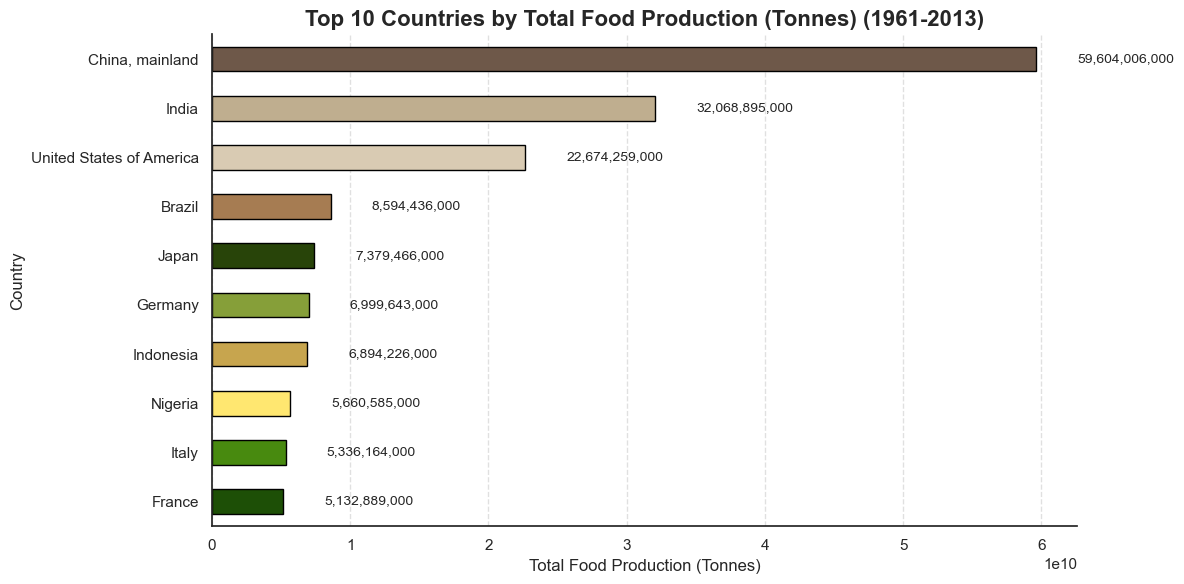

In [120]:
# Visualize the KPI total food production per year country
# Set up your color palette (Google-style vibrant tones)
colors = ['#1D4F06',  # Lincoln Green
          '#488A0F',  # Avocado
          '#FFE770',  # Shandy (sunlight yellow)
          '#C7A54E',  # Aztec Gold (harvest wheat)
          '#869F39',  # Palm Leaf
          '#284409',  # Deep Forest Green
          '#A67C52',  # Rustic Brown (wood/milk can tone)
          '#D9CBB3',  # Cream (dairy/milk)
          '#BFAE8F',  # Grain Beige
          '#6E5849']  # Earthy Taupe

# Prepare data
top_10_countries = KPI_total_production_yearly.groupby('country')['total_food_production_tonnes'].sum().sort_values(ascending=False).head(10)

# Reverse for horizontal orientation (optional but more readable if names are long)
top_10_countries = top_10_countries[::-1]

# Create figure
plt.figure(figsize=(12, 6))
ax = top_10_countries.plot(kind='barh', color=colors, edgecolor='black')

# Add value labels
for i, v in enumerate(top_10_countries):
    ax.text(v + 0.05 * max(top_10_countries), i, f'{v:,.0f}', va='center', fontsize=10)

# Style enhancements
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.set_axisbelow(True)

# Title and labels
plt.title('Top 10 Countries by Total Food Production (Tonnes) (1961-2013)', fontsize=16, weight='bold')
plt.xlabel('Total Food Production (Tonnes)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Tidy layout
plt.tight_layout()
plt.show()


In [121]:
df_final_merged

,country,country_code,food_item_prod,element_type,unit_of_measurement,latitude,longitude,year,production,production_tonnes,food_category,mapped_food_item,ghg_per_kg,land_use_per_kg,water_withdrawals_per_kg,GPOeq_per_kg,water_scarcity_per_kg,temperature_anomaly_c
0,Afghanistan,AFG,Wheat and products,Food,1000 tonnes,33.94,67.71,1961,1928.0,1928000.0,Wheat and products,Lamb moussaka,7.259162,9.825356,286.818897,12.504292,8521.204514,0.027941
1,Afghanistan,AFG,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,1961,183.0,183000.0,Rice,Falafels,1.098106,6.567524,81.751369,12.311576,4303.701929,0.027941
2,Afghanistan,AFG,Barley and products,Food,1000 tonnes,33.94,67.71,1961,237.0,237000.0,Barley,Apricot jam,1.382105,1.368510,851.048765,11.446767,24526.647687,0.027941
3,Afghanistan,AFG,Maize and products,Food,1000 tonnes,33.94,67.71,1961,403.0,403000.0,Maize,Chicken burger,5.434487,6.053407,379.126194,22.525743,9788.142590,0.027941
4,Afghanistan,AFG,Millet and products,Food,1000 tonnes,33.94,67.71,1961,17.0,17000.0,Millet,Chickpeas,1.344353,15.565608,161.385358,9.684822,9747.767149,0.027941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559696,Zimbabwe,ZWE,Alcoholic Beverages,Food,1000 tonnes,-19.02,29.15,2013,516.0,516000.0,Beverages,Ale,0.488690,0.811485,49.402842,1.633120,1891.148530,0.401412
559697,Zimbabwe,ZWE,Meat,Food,1000 tonnes,-19.02,29.15,2013,258.0,258000.0,Other Meat,Chicken pasta,2.946765,3.575445,309.999052,12.371863,10478.902282,0.401412
559698,Zimbabwe,ZWE,Offals,Food,1000 tonnes,-19.02,29.15,2013,22.0,22000.0,Other / Miscellaneous,Chocolate spread,5.372300,9.384214,1215.291286,22.957091,42638.172547,0.401412
559699,Zimbabwe,ZWE,Animal fats,Food,1000 tonnes,-19.02,29.15,2013,20.0,20000.0,Meat,Almond butter,0.387011,7.683045,6846.472597,18.723075,402211.960769,0.401412


In [122]:
# Visualize the KPI total food production per year country with Plotly
production_by_country_year = df_final_merged.groupby(['country', 'year', 'latitude', 'longitude']).agg(
    total_production_tonnes=('production_tonnes', 'sum')
).reset_index()

# Filter out rows where total_production_tonnes is 0 or NaN if any (though unlikely for sum)
production_by_country_year = production_by_country_year[
    production_by_country_year['total_production_tonnes'] > 0
].copy()

# Convert production to 1000 tons
# 1 tonne = 0.001 thousand tonnes
production_by_country_year['production (1000 tons)'] = production_by_country_year['total_production_tonnes'] / 1000


# --- Create the Animated Scatter Geo Plot ---
# This plot will show bubbles on countries, sized and colored by production, animated over years.
fig = px.scatter_geo(
    production_by_country_year,
    locations="country",                  # Column for country names
    locationmode="country names",         # Specifies that 'locations' are country names. Could also use 'ISO-3' codes.
    scope="world",                        # Scope of the map (world view)
    hover_name="country",                 # Display country name on hover
    size="production (1000 tons)",        # Size of the bubbles by production
    color="production (1000 tons)",       # Color of the bubbles by production
    animation_frame="year",               # Column to create the animation slider
    title="Worldwide Total Food Production (1961-2013)", # Chart title
    template="plotly_white",              # Use a clean white background template
    size_max=90,                          # Max size of bubbles to avoid overlap
    color_continuous_scale=px.colors.sequential.Viridis, # Color scale for production
    hover_data={
        "production (1000 tons)": ':.2f', # Format hover data for production
        "total_production_tonnes": False # Don't show this raw column in hover
    }
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showland=True, landcolor="lightgray",
        showocean=True, oceancolor="lightblue",
        showcountries=True, countrycolor="gray",
        showsubunits=True, subunitcolor="gray"
    ),
    sliders=[
        dict(
            steps=[
                dict(
                    method="animate",
                    args=[[f"year={year}"], {"frame": {"duration": 800, "redraw": True}, "mode": "immediate"}],
                    label=str(year)
                ) for year in production_by_country_year['year'].unique().tolist()
            ],
            transition=dict(duration=300),
            x=0.1, y=0,
            currentvalue=dict(font=dict(size=12), prefix="Year=", visible=True, xanchor="right")
        )
    ]
)

# To ensure the animation works smoothly in different environments,
# often useful to set the animation speed. Default is usually fine.
# fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500
# fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 300

# Save the plot as an HTML file (interactive plot)
# output_html_file = 'worldwide_total_production_animated_map.html'
#fig.write_html(output_html_file)
# print(f"\nInteractive animated map saved to '{output_html_file}'.")

# Display the plot (will open in default browser or show inline in supported environments)
fig.show()



##### 4.1.2. KPI: GHG Emissions per Food Category/Product (Total & Per Kg) 

In [123]:
df_final_merged.head()

,country,country_code,food_item_prod,element_type,unit_of_measurement,latitude,longitude,year,production,production_tonnes,food_category,mapped_food_item,ghg_per_kg,land_use_per_kg,water_withdrawals_per_kg,GPOeq_per_kg,water_scarcity_per_kg,temperature_anomaly_c
0,Afghanistan,AFG,Wheat and products,Food,1000 tonnes,33.94,67.71,1961,1928.0,1928000.0,Wheat and products,Lamb moussaka,7.259162,9.825356,286.818897,12.504292,8521.204514,0.027941
1,Afghanistan,AFG,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,1961,183.0,183000.0,Rice,Falafels,1.098106,6.567524,81.751369,12.311576,4303.701929,0.027941
2,Afghanistan,AFG,Barley and products,Food,1000 tonnes,33.94,67.71,1961,237.0,237000.0,Barley,Apricot jam,1.382105,1.368510,851.048765,11.446767,24526.647687,0.027941
3,Afghanistan,AFG,Maize and products,Food,1000 tonnes,33.94,67.71,1961,403.0,403000.0,Maize,Chicken burger,5.434487,6.053407,379.126194,22.525743,9788.142590,0.027941
4,Afghanistan,AFG,Millet and products,Food,1000 tonnes,33.94,67.71,1961,17.0,17000.0,Millet,Chickpeas,1.344353,15.565608,161.385358,9.684822,9747.767149,0.027941


In [124]:
environment_file_df

,ghg_per_kg,land_use_per_kg,GPOeq_per_kg,water_scarcity_per_kg,water_withdrawals_per_kg,food_item,year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022
...,...,...,...,...,...,...,...
206,5.232976,6.520732,20.053621,14237.870381,579.253113,Vegetarian pizza,2022
207,2.416308,11.875852,18.742980,160556.436125,3458.072291,Walnuts,2022
208,0.969403,1.009878,13.122616,13528.747411,743.313468,Watermelon,2022
209,1.722881,4.333116,4.642554,1925.669324,93.535379,Wine,2022


In [125]:
# KPI food item per ghg_per_kg using environmental impact factors dataset
KPI_food_item_ghg = environment_file_df.groupby('food_item')['ghg_per_kg'].mean().reset_index()
KPI_food_item_ghg.sort_values(by='ghg_per_kg', ascending=False, inplace=True)
KPI_food_item_ghg

,food_item,ghg_per_kg
21,Beef steak,129.747715
19,Beef mince,95.034572
18,Beef meatballs,70.787474
16,Beef burger,53.976371
110,Lamb chops,30.901993
...,...,...
135,Oat milk,0.453281
92,Frozen sweet potato fries,0.409885
1,Almond butter,0.387011
137,Onions,0.362860


In [126]:
# Display the KPI: GHG Emissions per Food Category/Product (Total & Per Kg)
KPI_GHG_per_food_category = df_final_merged.groupby(['country', 'year', 'food_category'])[['production_tonnes', 'temperature_anomaly_c']].sum().reset_index()
KPI_GHG_per_food_category.rename(columns={'production_tonnes': 'total_food_production_tonnes'}, inplace=True)
print("\n--- Total Global Food Production (by weight in tonnes) per year and country with Temperature Anomaly ---")
KPI_GHG_per_food_category


--- Total Global Food Production (by weight in tonnes) per year and country with Temperature Anomaly ---


,country,year,food_category,total_food_production_tonnes,temperature_anomaly_c
0,Afghanistan,1961,Apples,14000.0,0.027941
1,Afghanistan,1961,Bananas,0.0,0.027941
2,Afghanistan,1961,Barley,237000.0,0.027941
3,Afghanistan,1961,Beef,43000.0,0.027941
4,Afghanistan,1961,Beverages,0.0,0.083824
...,...,...,...,...,...
280842,Zimbabwe,2013,Sugar & Sweeteners,832000.0,1.204235
280843,Zimbabwe,2013,Tea,8000.0,0.401412
280844,Zimbabwe,2013,Tomatoes,25000.0,0.401412
280845,Zimbabwe,2013,Vegetables (Unspecified),421000.0,0.802824


In [127]:
# Prepare data
top_10_food_per_category = KPI_GHG_per_food_category.groupby('food_category')['total_food_production_tonnes'].sum().sort_values(ascending=False).head(20)
top_10_food_per_category

food_category
Vegetables (Unspecified)    3.931421e+10
Cereals                     3.409084e+10
Starchy Roots & Tubers      2.829420e+10
Fruits (Unspecified)        1.735307e+10
Milk                        1.708362e+10
Beverages                   1.481856e+10
Wheat and products          1.436705e+10
Rice                        1.291774e+10
Sugar & Sweeteners          1.170351e+10
Other Meat                  8.164501e+09
Oils & Fats                 4.394062e+09
Maize                       3.656416e+09
Pulses & Nuts               3.503470e+09
Fish, Seafood               3.307940e+09
Citrus Fruits               3.282092e+09
Tomatoes                    3.156026e+09
Pig Meat                    2.899212e+09
Finfish                     2.528853e+09
Beef                        2.179579e+09
Oil & Fats                  2.108941e+09
Name: total_food_production_tonnes, dtype: float64

In [128]:
df_final_merged

,country,country_code,food_item_prod,element_type,unit_of_measurement,latitude,longitude,year,production,production_tonnes,food_category,mapped_food_item,ghg_per_kg,land_use_per_kg,water_withdrawals_per_kg,GPOeq_per_kg,water_scarcity_per_kg,temperature_anomaly_c
0,Afghanistan,AFG,Wheat and products,Food,1000 tonnes,33.94,67.71,1961,1928.0,1928000.0,Wheat and products,Lamb moussaka,7.259162,9.825356,286.818897,12.504292,8521.204514,0.027941
1,Afghanistan,AFG,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,1961,183.0,183000.0,Rice,Falafels,1.098106,6.567524,81.751369,12.311576,4303.701929,0.027941
2,Afghanistan,AFG,Barley and products,Food,1000 tonnes,33.94,67.71,1961,237.0,237000.0,Barley,Apricot jam,1.382105,1.368510,851.048765,11.446767,24526.647687,0.027941
3,Afghanistan,AFG,Maize and products,Food,1000 tonnes,33.94,67.71,1961,403.0,403000.0,Maize,Chicken burger,5.434487,6.053407,379.126194,22.525743,9788.142590,0.027941
4,Afghanistan,AFG,Millet and products,Food,1000 tonnes,33.94,67.71,1961,17.0,17000.0,Millet,Chickpeas,1.344353,15.565608,161.385358,9.684822,9747.767149,0.027941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559696,Zimbabwe,ZWE,Alcoholic Beverages,Food,1000 tonnes,-19.02,29.15,2013,516.0,516000.0,Beverages,Ale,0.488690,0.811485,49.402842,1.633120,1891.148530,0.401412
559697,Zimbabwe,ZWE,Meat,Food,1000 tonnes,-19.02,29.15,2013,258.0,258000.0,Other Meat,Chicken pasta,2.946765,3.575445,309.999052,12.371863,10478.902282,0.401412
559698,Zimbabwe,ZWE,Offals,Food,1000 tonnes,-19.02,29.15,2013,22.0,22000.0,Other / Miscellaneous,Chocolate spread,5.372300,9.384214,1215.291286,22.957091,42638.172547,0.401412
559699,Zimbabwe,ZWE,Animal fats,Food,1000 tonnes,-19.02,29.15,2013,20.0,20000.0,Meat,Almond butter,0.387011,7.683045,6846.472597,18.723075,402211.960769,0.401412


In [129]:
# Total emissions and production per category
top_category_totals = df_final_merged.groupby('food_category')[['ghg_emissions_total', 'production_tonnes']].sum()

# Calculate emissions per kg
top_category_totals['ghg_per_kg'] = top_category_totals['ghg_emissions_total'] / (top_category_totals['production_tonnes'] * 1000)

# Sort by intensity
top_category_totals_sorted = top_category_totals.sort_values('ghg_per_kg', ascending=False)
top_category_totals_sorted


KeyError: "Columns not found: 'ghg_emissions_total'"

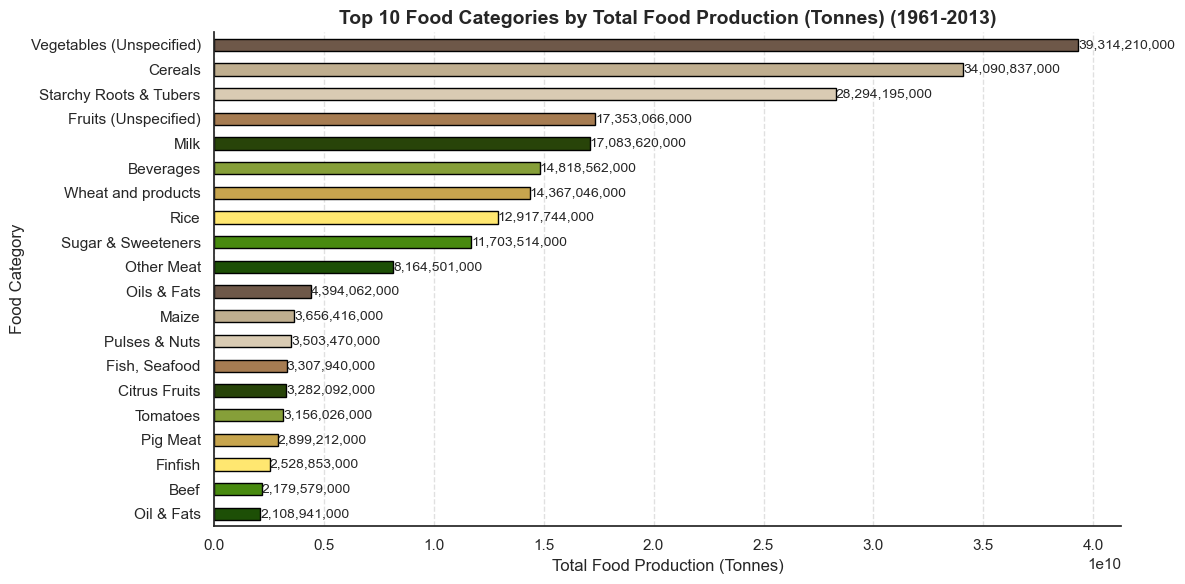

In [ ]:
# Visualize KPI_GHG_per_food_category

# Reverse the order to get highest at the top
top_10_food_per_category = top_10_food_per_category[::-1]

# Plot horizontally with colors
plt.figure(figsize=(12, 6))
ax = top_10_food_per_category.plot(kind='barh', color=colors, edgecolor='black')

# Add value labels
for i, v in enumerate(top_10_food_per_category):
    ax.text(v + 0.1, i, f'{v:,.0f}', va='center', fontsize=10)

# Style tweaks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.set_axisbelow(True)

plt.title('Top 10 Food Categories by Total Food Production (Tonnes) (1961-2013)', fontsize=14, weight='bold')
plt.xlabel('Total Food Production (Tonnes)')
plt.ylabel('Food Category')
plt.tight_layout()
plt.show()


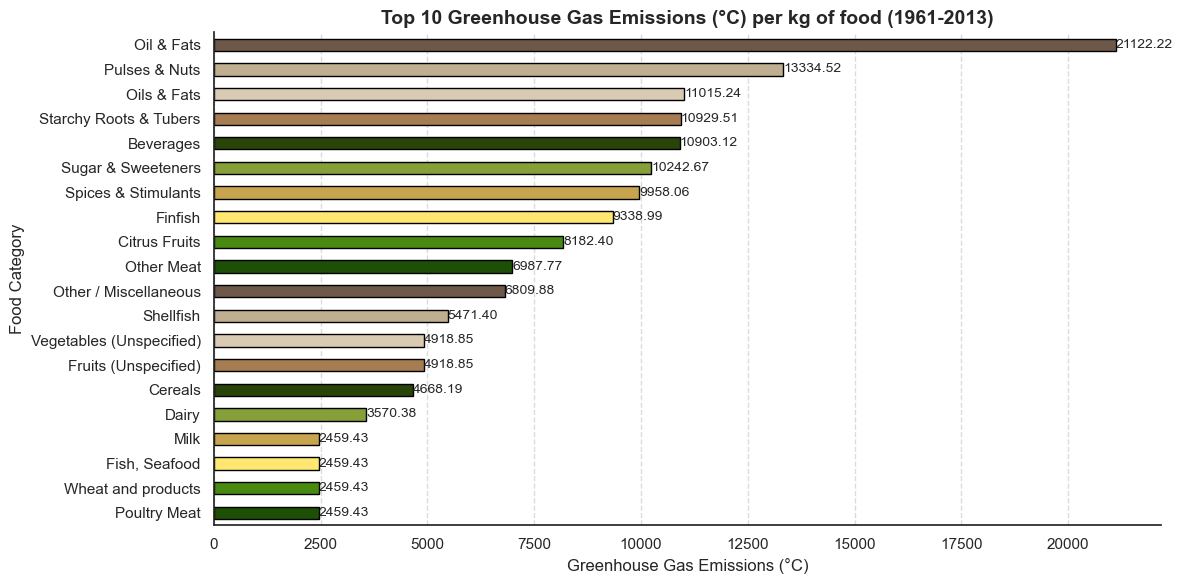

In [ ]:
 # Visualize KPI_GHG_per_food_category per greenhouse gas emissions
# Prepare data
Greenhouse_gas_emissions_per_food_category = KPI_GHG_per_food_category.groupby('food_category')['temperature_anomaly_c'].sum().sort_values(ascending=False).head(20)

# Reverse the order to get highest at the top
Greenhouse_gas_emissions_per_food_category = Greenhouse_gas_emissions_per_food_category[::-1]

# Plot with custom colors
plt.figure(figsize=(12, 6))
ax = Greenhouse_gas_emissions_per_food_category.plot(kind='barh', color=colors, edgecolor='black')

# Add value labels
for i, v in enumerate(Greenhouse_gas_emissions_per_food_category):
    ax.text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=10)

# Style tweaks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

plt.title('Top 10 Greenhouse Gas Emissions (°C) per kg of food (1961-2013)', fontsize=14, weight='bold')
plt.xlabel('Greenhouse Gas Emissions (°C)')
plt.ylabel('Food Category')
plt.tight_layout()
plt.show()

Emissions are measured in carbon dioxide equivalents (CO2eq). This means non-CO2 gases are weighted by the amount of warming
they cause over a 100-year timescale.

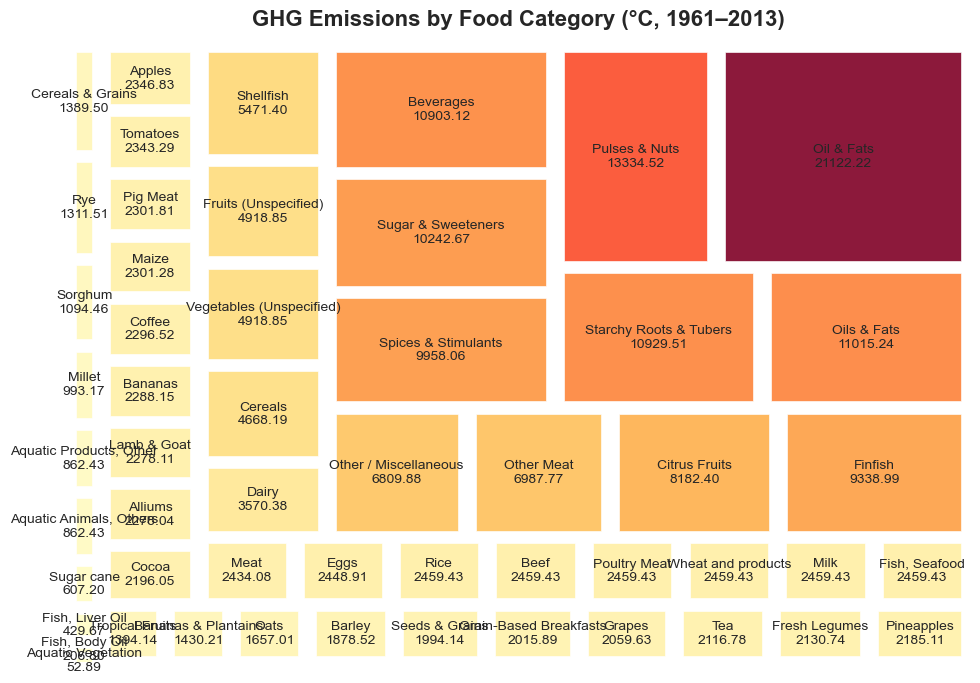

In [ ]:
# Create a treemap visualization of the food categories and their greenhouse gas emissions

# 'BrBG'
# 'YlOrRd'
# 'OrRd'

import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Prepare and sort data
treemap_data = KPI_GHG_per_food_category.groupby('food_category')['temperature_anomaly_c'].sum().reset_index()
treemap_data = treemap_data.sort_values(by='temperature_anomaly_c', ascending=True)

# Normalize values for colormap
norm = mcolors.Normalize(vmin=treemap_data['temperature_anomaly_c'].min(),
                         vmax=treemap_data['temperature_anomaly_c'].max())
cmap = cm.get_cmap('YlOrRd')  # You can choose any colormap you like
colors = [mcolors.to_hex(cmap(norm(val))) for val in treemap_data['temperature_anomaly_c']]

# Create labels
labels = [
    f"{cat}\n{val:.2f}"
    for cat, val in zip(treemap_data['food_category'], treemap_data['temperature_anomaly_c'])
]

# Plot
plt.figure(figsize=(10, 7))
squarify.plot(
    sizes=treemap_data['temperature_anomaly_c'],
    label=labels,
    color=colors,
    edgecolor='white',
    linewidth=0.5,
    alpha=0.9,
    pad=True,
    text_kwargs={'fontsize': 10}
)

plt.title('GHG Emissions by Food Category (°C, 1961–2013)', fontsize=16, weight='bold', pad=15)
plt.axis('off')
plt.tight_layout()
plt.show()

##### 4.1.3. KPI: Country-level GHG emissions per food production

* This KPI points to which countries have the most carbon-intensive food production systems on a per-unit basis, not necessarily who is the largest overall emitter.

In [ ]:
# Create a KPI for country-level GHG emissions per food production

# Convert ghg_per_kg to ghg_per_tonne for easier comparison by multiplying by 1000
# 1 kg = 0.001 tonnes, so ghg_per_kg * 1000 = ghg_per_tonne
ghg_per_tonne = df_final_merged['ghg_per_kg'] * 1000

# Add the ghg_per_tonne to the final merged DataFrame
df_final_merged['ghg_per_tonne'] = ghg_per_tonne

# production_tonnes is already in tonnes, ghg_per_tonne is GHG emissions per tonne of food
# Calculate the total_ghg_emissions for each row by multiplying production_tonnes by ghg_per_tonne
df_final_merged['total_ghg_emissions'] = df_final_merged['production_tonnes'] * df_final_merged['ghg_per_tonne']

# Group by country, year, and sum the total_ghg_emissions and production_tonnes
country_year_kpi = df_final_merged.groupby(['country', 'year']).agg(
    total_ghg_emissions=('total_ghg_emissions', 'sum'),
    total_production_tonnes=('production_tonnes', 'sum')
).reset_index()

# Calculate the KPI: GHG emissions per tonne of food production
# Handle potential division by zero if total_production_tonnes is 0
country_year_kpi['ghg_emissions_per_production_tonne'] = country_year_kpi.apply(
    lambda row: row['total_ghg_emissions'] / row['total_production_tonnes'] if row['total_production_tonnes'] != 0 else 0,
    axis=1)

In [ ]:
top_10_countries_ghg = country_year_kpi.groupby('country')['ghg_emissions_per_production_tonne'].sum().sort_values(ascending=False).head(25)
top_10_countries_ghg

country
Afghanistan      0.0
Mexico           0.0
Norway           0.0
Nigeria          0.0
Niger            0.0
Nicaragua        0.0
New Zealand      0.0
New Caledonia    0.0
Netherlands      0.0
Nepal            0.0
Namibia          0.0
Myanmar          0.0
Mozambique       0.0
Morocco          0.0
Mongolia         0.0
Mauritius        0.0
Albania          0.0
Mauritania       0.0
Malta            0.0
Mali             0.0
Malaysia         0.0
Malawi           0.0
Madagascar       0.0
Liberia          0.0
Lesotho          0.0
Name: ghg_emissions_per_production_tonne, dtype: float64

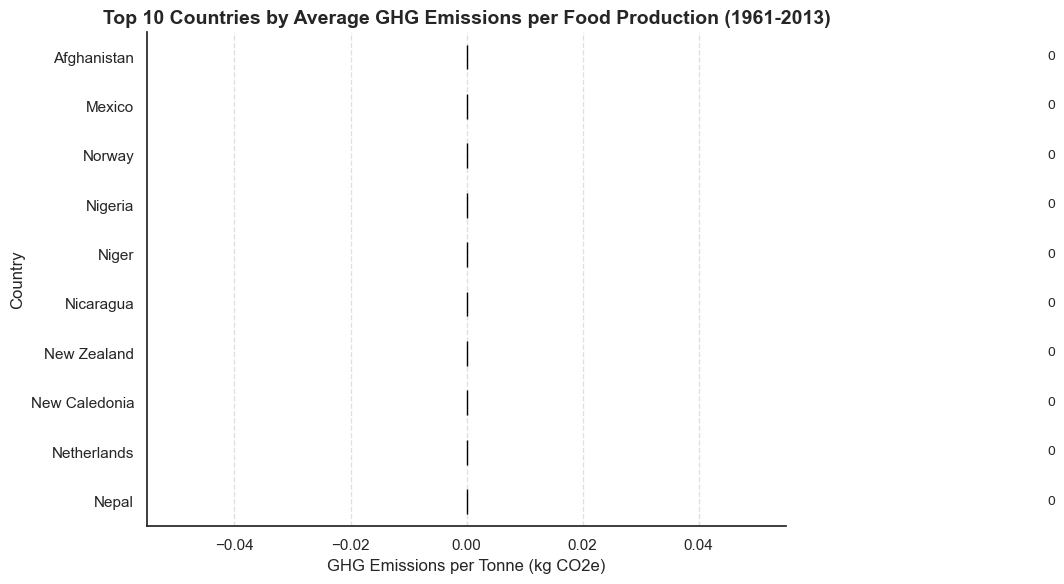

In [ ]:
# Visalize the KPI_GHG_per_food_production
# Prepare data
top_10_countries_ghg = country_year_kpi.groupby('country')['ghg_emissions_per_production_tonne'].sum().sort_values(ascending=False).head(10)
# Reverse the order to get highest at the top
top_10_countries_ghg = top_10_countries_ghg[::-1]
# Plot with custom colors
plt.figure(figsize=(12, 6))
ax = top_10_countries_ghg.plot(kind='barh', color=plt.get_cmap('viridis')(np.linspace(0, 1, 10)), edgecolor='black')

# Add value labels
for i, v in enumerate(top_10_countries_ghg):
    ax.text(v + 0.1, i, f'{v:,.0f}', va='center', fontsize=10)
# Style tweaks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
plt.title('Top 10 Countries by Average GHG Emissions per Food Production (1961-2013)', fontsize=14, weight='bold')
plt.xlabel('GHG Emissions per Tonne (kg CO2e)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

The top 10 countries based on their average country-level GHG emissions per food production (in tonnes of CO2 equivalent per tonne of food produced) are:

* Sri Lanka: 16422.68
* Vanuatu: 15985.85
* Fiji: 14076.82
* Iraq: 13734.95
* Tunisia: 13106.37
* Turkey: 12076.93
* Jordan: 12028.61
* Iran (Islamic Republic of): 11930.54
* Albania: 11764.45
* Afghanistan: 11719.95

This ranking represents countries that, on average over the available years, have the highest GHG emissions relative to their total food production volume.

Countries like the USA or China have a very high total greenhouse gas emissions, given their massive scales of agricultural and industrial output. However, the KPI we calculated is GHG emissions per tonne of food production (tonnes of CO2 equivalent per tonne of food produced). This is a measure of emissions intensity, not total emissions.

Here's why countries like Sri Lanka, Vanuatu, or Fiji might appear at the top of this particular list, rather than the USA or China:

Emissions Intensity vs. Total Emissions:
* Total Emissions: Large agricultural producers like the USA and China produce an immense volume of food, which naturally leads to high total emissions.
* Emissions Intensity (our KPI): This metric looks at how much GHG is emitted for each unit of food produced. A country might have lower total production but higher emissions per unit if:
    * Production Mix: Their primary food production might be heavily weighted towards emission-intensive food items. For example, certain types of meat (like beef or lamb) and dairy products have significantly higher GHG emissions per kilogram compared to fruits, vegetables, or grains. If a country's agricultural output is disproportionately made up of these high-impact foods, its intensity KPI will be higher.
    * Farming Practices: The specific farming methods used in a country can also influence intensity. Less efficient practices, higher reliance on certain fertilizers, or specific land use changes can lead to more emissions per unit of output.
    * Smaller Scale, Higher Variability: Smaller economies or those with less diversified agricultural sectors might see their intensity figures fluctuate more drastically based on the dominant crops or livestock.

The USA and China, despite their large overall emissions, might also produce vast quantities of less emission-intensive foods (e.g., corn, rice, soybeans) or use highly efficient large-scale farming techniques, which could "dilute" their average emissions per tonne of food produced, leading to a lower intensity score compared to countries focusing on more impactful food types.


Bar chart saved as 'top_10_ghg_countries_bar_chart.png'.


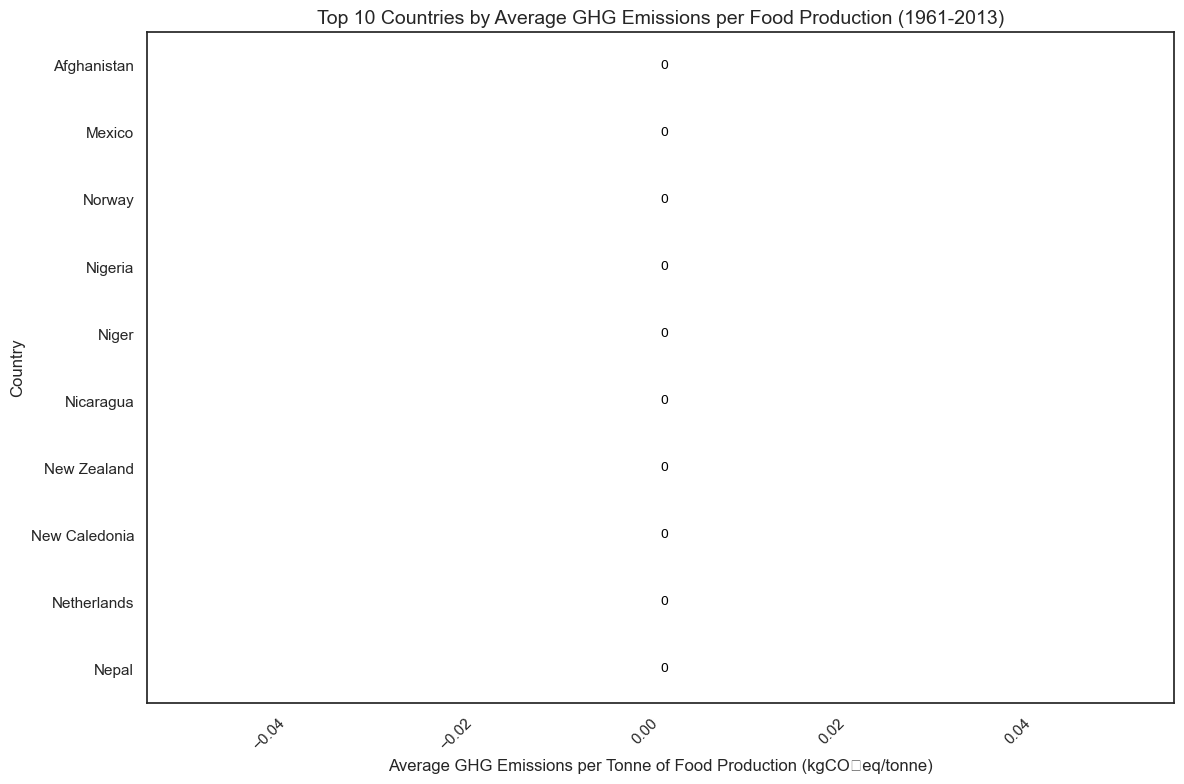

In [ ]:
# Calculate the average KPI for each country over all available years
country_avg_kpi = country_year_kpi.groupby('country')['ghg_emissions_per_production_tonne'].mean().reset_index()

# Sort by the average KPI in descending order and get the top 10
top_10_countries = country_avg_kpi.sort_values(
    by='ghg_emissions_per_production_tonne',
    ascending=False
).head(10)

# --- Create the Bar Chart Visualization ---
plt.figure(figsize=(12, 8)) # Set figure size for better readability
sns.barplot(
    x='ghg_emissions_per_production_tonne',
    y='country',
    data=top_10_countries,
    palette='viridis' # Choose a color palette
)

# Add labels and title
plt.xlabel('Average GHG Emissions per Tonne of Food Production (kgCO₂eq/tonne)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 Countries by Average GHG Emissions per Food Production (1961-2013)', fontsize=14)

# Customize ticks and layout
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Add data labels to the bars for clarity
for index, value in enumerate(top_10_countries['ghg_emissions_per_production_tonne']):
    plt.text(value, index, f'{value:,.0f}', va='center', ha='left', fontsize=10, color='black')


# Save the plot as an image file
plot_filename = 'top_10_ghg_countries_bar_chart.png'
plt.savefig(plot_filename, dpi=300) # Save with high resolution
print(f"\nBar chart saved as '{plot_filename}'.")

# Display the plot
plt.show()

##### 4.1.4. Total GHG Emissions by Food Category (Global & Over Time)

* This KPI will help us understand which broad food categories contribute the most to global greenhouse gas emissions over time

In [ ]:
# Recalculate total_ghg_emissions for clarity and robustness,
    # ensuring it's in tonnes of CO2 equivalent per tonne of food production.
    # production_tonnes (tonnes of food) * ghg_per_kg (kgCO2eq/kg_food)
df_final_merged['total_ghg_emissions'] = df_final_merged['production_tonnes'] * df_final_merged['ghg_per_kg']

# --- KPI: Total GHG Emissions by Food Category (Global & Over Time) ---

# Group by Year and Food_Category, then sum the total_ghg_emissions
ghg_by_category_kpi = df_final_merged.groupby(['year', 'food_category']).agg( #add a new column for total GHG emissions by tonnes of CO2 equivalent
    total_ghg_emissions_tonnes_CO2eq=('total_ghg_emissions', 'sum')
).reset_index()

print("\n--- KPI: Total GHG Emissions by Food Category (Global & Over Time - Head) ---")
print(ghg_by_category_kpi.head())


--- KPI: Total GHG Emissions by Food Category (Global & Over Time - Head) ---
   year            food_category  total_ghg_emissions_tonnes_CO2eq
0  1961                  Alliums                               0.0
1  1961                   Apples                               0.0
2  1961  Aquatic Animals, Others                               0.0
3  1961  Aquatic Products, Other                               0.0
4  1961       Aquatic Vegetation                               0.0


In [ ]:
# save the KPI DataFrame to a CSV file

In [ ]:
# --- Top food categories (all years combined) by GHG emissions ---
overall_top_categories = ghg_by_category_kpi.groupby('food_category').agg(
    overall_ghg_emissions_tonnes_CO2eq=('total_ghg_emissions_tonnes_CO2eq', 'sum')
).reset_index().sort_values(by='overall_ghg_emissions_tonnes_CO2eq', ascending=False)

print("\n--- Overall Top Food Categories by GHG Emissions (All Years Combined) ---")
print(overall_top_categories.head(10))


--- Overall Top Food Categories by GHG Emissions (All Years Combined) ---
            food_category  overall_ghg_emissions_tonnes_CO2eq
0                 Alliums                                 0.0
27                   Meat                                 0.0
29                 Millet                                 0.0
30                   Oats                                 0.0
31             Oil & Fats                                 0.0
32            Oils & Fats                                 0.0
33  Other / Miscellaneous                                 0.0
34             Other Meat                                 0.0
35               Pig Meat                                 0.0
36             Pineapples                                 0.0


<Figure size 1400x800 with 0 Axes>

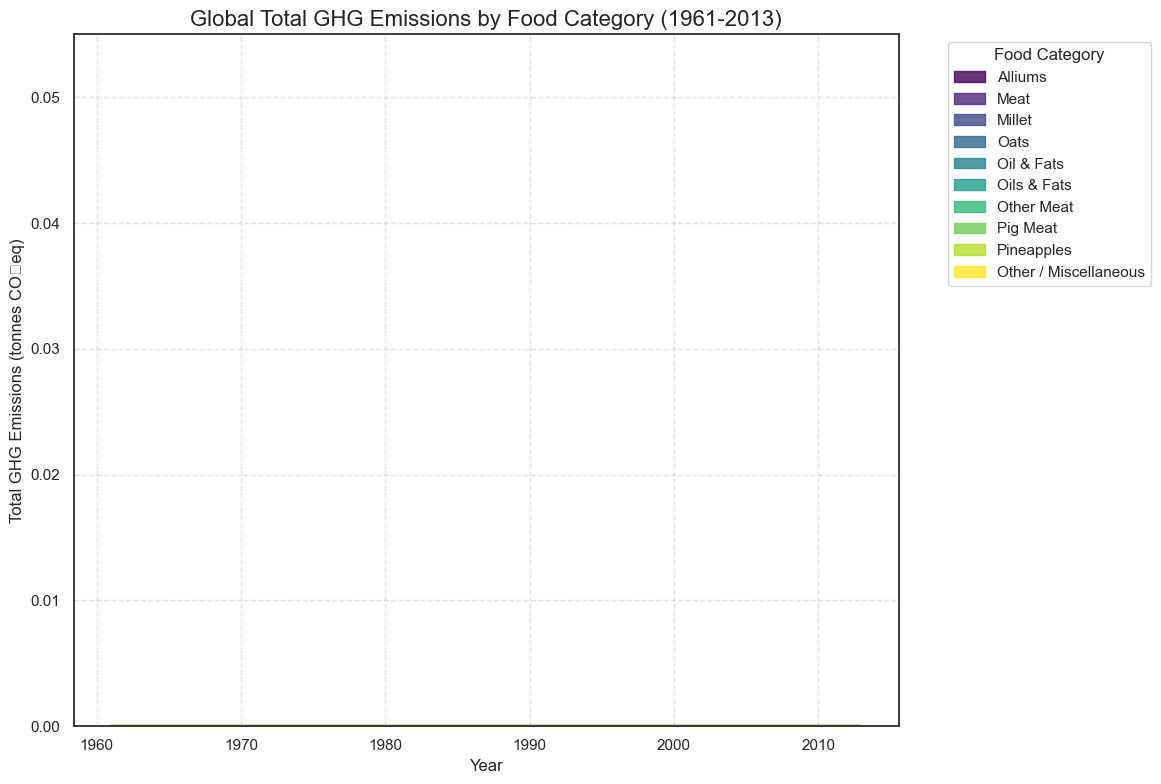

In [ ]:
# Visualize GHG emissions by food category over time

# top_10
top_n = 10
overall_category_sum = ghg_by_category_kpi.groupby('food_category')['total_ghg_emissions_tonnes_CO2eq'].sum().sort_values(ascending=False)
top_categories = overall_category_sum.head(top_n).index.tolist()

# create a new column for categorized data
ghg_by_category_kpi['food_category_grouped'] = ghg_by_category_kpi['food_category'].apply(
    lambda x: x if x in top_categories else 'Other / Miscellaneous')

# Recalculate sums with the grouped categories
df_plot_data = ghg_by_category_kpi.groupby(['year', 'food_category_grouped']).agg(
    total_ghg_emissions_tonnes_CO2eq=('total_ghg_emissions_tonnes_CO2eq', 'sum')
).reset_index()

# Pivot the data for stacked area plot
df_pivot = df_plot_data.pivot(index='year', columns='food_category_grouped', values='total_ghg_emissions_tonnes_CO2eq').fillna(0)

# Ensure 'Other / Miscellaneous' is the last column for plotting at the bottom of stack
if 'Other / Miscellaneous' in df_pivot.columns:
    cols = [col for col in df_pivot.columns if col != 'Other / Miscellaneous'] + ['Other / Miscellaneous']
    df_pivot = df_pivot[cols]

# --- Create the Stacked Area Chart ---
plt.figure(figsize=(14, 8))
df_pivot.plot(kind='area', stacked=True, alpha=0.8, figsize=(14, 8), cmap='viridis') # Using viridis colormap

plt.title('Global Total GHG Emissions by Food Category (1961-2013)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GHG Emissions (tonnes CO₂eq)', fontsize=12)
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend

# Save the plot
# plot_filename_time = 'ghg_emissions_by_food_category_over_time.png'
#plt.savefig(plot_filename_time, dpi=300)
# print(f"\nStacked area chart saved as '{plot_filename_time}'.")

plt.show()

##### 4.2. Descriptive Statistics

4.2.1. Meet your data

* Create relationships between variables
* Heatmap
* Explore if they change per country.


In [ ]:
# Check the shape of the dataset
# print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

In [ ]:
# Meet your dataset with EDA
# data.describe().T.style.background_gradient(cmap='Blues', low=0, high=1, axis=None).set_properties(**{'font-size': '12pt'})
# T.style() is used to apply styles to the DataFrame

## 5. Hypothesis Testing & Statistical Analysis
* 5.1. Correlation Analysis (Pearson)
* 5.2. T-Test for Emission Differences by Food Type
* 5.3. ANOVA for Historical Emission Trends

## 6. Data Visualization & Insights
* 6.1. Food Production vs. Climate Trends
* 6.2. Regional Impact Analysis
* 6.3. Top Food Categories by Emissions

## 7. Findings & Interpretations
* 7.1. Summary of Key Insights
* 7.2. Policy & Sustainability Implications

## 8. Repository Setup & Documentation
* GitHub Organization
* File Structure & README.md
* Future Work